# Cleaning All Data Sources

## Trauma Data

Here is the trauma data that I scraped from the American College of Surgeons

In [1]:
import pandas as pd

trauma_data = pd.read_json('trauma_data.json', orient='records')
print(trauma_data.shape)
print(trauma_data.head())

(486, 3)
                                             address  \
0  13677 W. McDowell Rd., Suite 201, Goodyear, AZ...   
1           875 8th St. NE, Massillon, OH 44646-3554   
2                One Perkins Square, Akron, OH 44308   
3            4315 Diplomacy Dr., Anchorage, AK 99508   
4  43 New Scotland Ave., Mail Code 194, Albany, N...   

                       hospital                              level  
0            Abrazo West Campus             Level II Trauma Center  
1       Affinity Medical Center            Level III Trauma Center  
2     Akron Children's Hospital   Level II Pediatric Trauma Center  
3  Alaska Native Medical Center             Level II Trauma Center  
4         Albany Medical Center              Level I Trauma Center  


In [2]:
zip_list = []
state_list = []
city_list = []
for each in trauma_data.address:
    zip_code = each.split(" ")[-1]
    zip_list.append(zip_code.split("-")[0])
    state_list.append(each.split(" ")[-2])
    city_list.append(each.split(",")[-2])

In [3]:
#trauma_data['zip_code'] = zip_list
trauma_data['state'] = state_list
trauma_data['city'] = city_list

In [4]:
trauma_data = trauma_data.drop('address',axis=1)

In [5]:
adult_list = []
for each in trauma_data.level:
    if 'Pediatric' in each:
        if len(each.split(',')) > 1:
               adult_list.append(each.split(",")[0])
        else:
            adult_list.append(None)
    else:
        adult_list.append(each)

In [6]:
for i in range(len(adult_list)):
    if adult_list[i] != None:
        if "Trauma" in adult_list[i]:
            adult_list[i] = adult_list[i].split('Trauma')[0]
        else:
            adult_list[i] = adult_list[i].split('Adult')[0]

In [7]:
trauma_data['adult_trauma'] = adult_list

In [8]:
ped_list = []
for each in trauma_data.level:
    if 'Pediatric' in each.split(",")[-1]:
        ped_list.append(each.split(",")[-1])
    else:
        ped_list.append(None)

In [9]:
for i in range(len(ped_list)):
    if ped_list[i] != None:
        ped_list[i] = ped_list[i].split('Pediatric')[0]

In [10]:
trauma_data['pediatric_trauma'] = ped_list

In [11]:
trauma_data = trauma_data.drop('level',axis=1)

In [12]:
trauma_data = trauma_data.sort_values(by=['state','city'])

In [13]:
trauma_data.index = range(len(trauma_data.index))

In [14]:
trauma_data['hospital'] = trauma_data.hospital.str.title()
trauma_data['hospital'] = trauma_data.hospital.str.strip()
trauma_data['city'] = trauma_data.city.str.strip()
trauma_data['state'] = trauma_data.state.str.strip()

In [15]:
trauma_data

hospital state  \
0                         Alaska Native Medical Center    AK   
1                     Providence Alaska Medical Center    AK   
2         University Of Alabama At Birmingham Hospital    AL   
3                         Arkansas Children'S Hospital    AR   
4          University Of Arkansas For Medical Sciences    AR   
5      Dignity Health Chandler Regional Medical Center    AZ   
6                                   Abrazo West Campus    AZ   
7                       Havasu Regional Medical Center    AZ   
8                        Banner Baywood Medical Center    AZ   
9                        Mountain Vista Medical Center    AZ   
10            Banner University Medical Center Phoenix    AZ   
11   Dignity Health St. Joseph'S Hospital And Medic...    AZ   
12              Honorhealth Deer Valley Medical Center    AZ   
13          Honorhealth John C. Lincoln Medical Center    AZ   
14   Maricopa Integrated Health System - Maricopa M...    AZ   
15                         Phoenix Children'S Hospital    AZ   
16        Honorhealth Scottsdale Osborn Medical Center    AZ   
17                    Banner Del W Webb Medical Center    AZ   
18          Tuba City Regional Health Care Corporation    AZ   
19           Banner University Medical Center - Tucson    AZ   
20                       Mercy San Juan Medical Center    CA   
21                   Sutter Health Eden Medical Center    CA   
22                   Arrowhead Regional Medical Center    CA   
23                              Palomar Medical Center    CA   
24                             Northbay Medical Center    CA   
25                   Community Regional Medical Center    CA   
26                              Marin General Hospital    CA   
27                           Scripps Memorial Hospital    CA   
28                            Antelope Valley Hospital    CA   
29                  Long Beach Memorial Medical Center    CA   
..                                                 ...   ...   
456                      Dixie Regional Medical Center    UT   
457                        Primary Children'S Hospital    UT   
458                     University Of Utah Health Care    UT   
459               University Of Virginia Health System    VA   
460                             Inova Fairfax Hospital    VA   
461                                Chippenham Hospital    VA   
462    Virginia Commonwealth University Medical Center    VA   
463                 Carilion Roanoke Memorial Hospital    VA   
464           The University Of Vermont Medical Center    VT   
465             Mayo Clinic Health System - Eau Claire    WI   
466                      Aurora Baycare Medical Center    WI   
467                   St. Vincent Hospital - Green Bay    WI   
468             Mercyhealth Hospital And Trauma Center    WI   
469                            Gundersen Health System    WI   
470  University Of Wisconsin Hospital And Clinics A...    WI   
471                          Marshfield Medical Center    WI   
472                   Children'S Hospital Of Wisconsin    WI   
473                                 Froedtert Hospital    WI   
474         Thedacare Regional Medical Center - Neenah    WI   
475                     Aurora Medical Center - Summit    WI   
476                            Aspirus Wausau Hospital    WI   
477                           Raleigh General Hospital    WV   
478                     Charleston Area Medical Center    WV   
479                         Cabell Huntington Hospital    WV   
480             St. Mary'S Medical Center - Huntington    WV   
481                            Berkeley Medical Center    WV   
482                 West Virginia University Hospitals    WV   
483                        Camden Clark Medical Center    WV   
484                                  Wheeling Hospital    WV   
485                   Cheyenne Regional Medical Center    WY   

                 city adult_trauma pediatric_trauma  
0           Anchorage  

## Fall Data

This is the fall data that I scraped from Hospital-data.com

In [16]:
import pandas as pd

fall_data = pd.read_json('hospital_data.json', orient='records')
print(fall_data.shape)
print(fall_data.head())

(2261, 3)
                                           hospital hospital_falls state_falls
0                BECKLEY ARH HOSPITAL - BECKLEY, WV         2.096%      0.833%
1  CAMPBELL COUNTY MEMORIAL HOSPITAL - GILLETTE, WY         0.727%      1.114%
2      ALASKA NATIVE MEDICAL CENTER - ANCHORAGE, AK         1.312%      1.414%
3  ADVENTIST MEDICAL CENTER - REEDLEY - REEDLEY, CA         1.522%      0.625%
4              BRIDGEPORT HOSPITAL - BRIDGEPORT, CT         0.622%      0.552%


In [17]:
fall_list = []
state_fall = []
for each in fall_data.hospital_falls:
    fall_list.append(each.split("%")[0])
for each in fall_data.state_falls:
    state_fall.append(each.split("%")[0])

In [18]:
fall_data['hospital_falls'] = fall_list
fall_data['state_falls'] = state_fall

In [19]:
states_data = []
for each in fall_data.hospital:
    states_data.append(each.split(",")[-1])

In [20]:
city_data = []
cities = []
hospitals = []
for each in fall_data.hospital:
    hospitals.append(each.split("-")[:-1])
    city_data.append(each.split("-")[-1])
for each in city_data:
    cities.append(each.split(",")[0])

In [21]:
fall_data['state'] = states_data
fall_data['city'] = cities
fall_data['hospital'] = hospitals

In [22]:
hospital_list = []
for each in fall_data.hospital:
    hospital_list.append("".join(each))

In [23]:
each_hospital = []
for each in hospital_list:
    item = each.split("  ")
    each_hospital.append(" ".join(item))

In [24]:
fall_data['hospital'] = each_hospital

In [25]:
fall_data = fall_data.sort_values(by=['state','city'])

In [26]:
fall_data['hospital'] = fall_data.hospital.str.title()
fall_data['city'] = fall_data.city.str.title()

In [27]:
fall_data.index = range(len(fall_data.index))

In [28]:
fall_data['hospital'] = fall_data.hospital.str.strip()
fall_data['city'] = fall_data.city.str.strip()
fall_data['state'] = fall_data.state.str.strip()

In [29]:
fall_data

hospital hospital_falls  \
0                        Alaska Native Medical Center          1.312   
1                  Yukon Kuskokwim Delta Reg Hospital          1.742   
2                         Fairbanks Memorial Hospital          0.790   
3                               Mt Edgecumbe Hospital          1.812   
4                       Shelby Baptist Medical Center          0.141   
5                                    Russell Hospital          0.621   
6                      Stringfellow Memorial Hospital          0.613   
7                            Athenslimestone Hospital          0.872   
8     Medical West, An Affiliate Of Uab Health System          0.983   
9                      University Of Alabama Hospital          0.329   
10                             Trinity Medical Center          1.342   
11                           Brookwood Medical Center          0.401   
12                    Baptist Medical Centerprinceton          0.238   
13                      Marshall Medical Center South          0.212   
14                     D W Mcmillan Memorial Hospital          0.445   
15                                Bibb Medical Center          3.460   
16                    Cullman Regional Medical Center          0.772   
17                             Parkway Medical Center          0.291   
18                           Decatur General Hospital          0.443   
19                   Southeast Alabama Medical Center          0.981   
20                                   Flowers Hospital          0.478   
21                          Medical Center Enterprise          0.280   
22                                    Thomas Hospital          1.089   
23                     Eliza Coffee Memorial Hospital          0.558   
24              South Baldwin Regional Medical Center          0.390   
25                     Dekalb Regional Medical Center          0.297   
26                  Riverview Regional Medical Center          0.355   
27                    Gadsden Regional Medical Center          1.048   
28                      Marshall Medical Center North          0.870   
29                                Huntsville Hospital          1.046   
...                                               ...            ...   
2231                         Raleigh General Hospital          0.652   
2232                Bluefield Regional Medical Center          0.624   
2233                           United Hospital Center          1.429   
2234                              St Francis Hospital          1.847   
2235                   Charleston Area Medical Center          0.382   
2236                          Davis Memorial Hospital          0.456   
2237                        Fairmont General Hospital          0.225   
2238                         St Mary'S Medical Center          0.874   
2239                    Cabellhuntington Hospital Inc          0.863   
2240                       Camc Teays Valley Hospital          0.391   
2241                    Logan Regional Medical Center          0.910   
2242                                    City Hospital          0.188   
2243               West Virginia University Hospitals          0.756   
2244               Monongalia County General Hospital          0.730   
2245                           Wetzel County Hospital          1.058   
2246                      Camden Clark Medical Center          0.617   
2247                         Pleasant Valley Hospital          0.359   
2248                     Princeton Community Hospital          0.461   
2249                         Jackson General Hospital          0.601   
2250                 Greenbrier Valley Medical Center          1.775   
2251                         Thomas Memorial Hospital          1.146   
2252             Summersville Regional Medical Center          0.581   
2253                                Wheeling Hospital          0.636   
2254                       Ohio Valley Medical Center          1.561   
2255         

## Healthcare Worker Injury Rates

This is data on the rate of employee injury in the healthcare industry that I downloaded from the Bureau of Labor Statistics State Occupational Injuries, Illnesses, and Fatalities. 

In [30]:
import os
import pandas as pd

hospital_state = []
hospital_data = []

def scan_folder(parent):
    
    # iterate over all the files in directory 'parent'
    for subdir, dirs, files in os.walk(parent):
        for file in files:
            #print(file)
            file_name = '/Users/carleyfletcher/industry_injury/' + file

            xl = pd.ExcelFile(file_name)

            title_data = xl.parse()

            state = title_data.columns[0].split(",")[-2]
            hospital_state.append(state)

            # Load a sheet into a DataFrame by name: file_load
            file_load = xl.parse(header=2)
            file_load = file_load.drop('NAICS code3', axis=1)
            file_load = file_load.dropna()
            file_load['Industry2'] = file_load['Industry2'].str.strip()

            hospital_data.append(file_load[file_load['Industry2'] == 'Hospitals'])
        
    return hospital_state, hospital_data

scan_folder("/Users/carleyfletcher/industry_injury")

([' Alabama',
  ' Alaska',
  ' Arizona',
  ' Arkansas',
  ' California',
  ' Connecticut',
  ' Delaware',
  ' District of Columbia',
  ' Georgia',
  ' Hawaii',
  ' Illinois',
  ' Indiana',
  ' Iowa',
  ' Kansas',
  ' Kentucky',
  ' Louisiana',
  ' Maine',
  ' Maryland',
  ' Massachusetts',
  ' Michigan',
  ' Minnesota',
  ' Missouri',
  ' Montana',
  ' Nebraska',
  ' Nevada',
  ' New Jersey',
  ' New Mexico',
  ' New York',
  ' North Carolina',
  ' Ohio',
  ' Oregon',
  ' Pennsylvania',
  ' Puerto Rico',
  ' South Carolina',
  ' Tennessee',
  ' Texas',
  ' Utah',
  ' Vermont',
  ' Virginia',
  ' Virgin Islands',
  ' Washington',
  ' West Virginia',
  ' Wisconsin',
  ' Wyoming'],
 [     Industry2 Total recordable cases Total Cases with days away from work4  \
  102  Hospitals                    6.2   1.8                             0.8   
  
      Cases with job transfer or restriction Other recordable cases  
  102                                      1                    4.3  ,
      

In [31]:
total_recordable_cases = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Total recordable cases']:
        temp_list.append(each)
    total_recordable_cases[hospital_state[i]] = temp_list
    
total_recordable = []
for each in total_recordable_cases.values():
    if '-' in each:
        while '-' in each: each.remove('-')
        if len(each) == 0:
            total_recordable.append(0)
        else:
            total_recordable.append(round(sum(each)/len(each),1))
    else:
        total_recordable.append(round(sum(each)/len(each),1))

In [32]:
total = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Total']:
        temp_list.append(each)
    total[hospital_state[i]] = temp_list
    
total_list = []
for each in total.values():
    if '-' in each:
        while '-' in each: each.remove('-')
        if len(each) == 0:
            total_list.append(0)
        else:
            total_list.append(round(sum(each)/len(each),1))
    else:
        total_list.append(round(sum(each)/len(each),1))

In [33]:
cases_away_work = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Cases with days away from work4']:
        temp_list.append(each)
    cases_away_work[hospital_state[i]] = temp_list
    
cases_away = []
for each in cases_away_work.values():
    if '-' in each:
        while '-' in each: each.remove('-')
        if len(each) == 0:
            cases_away.append(0)
        else:
            cases_away.append(round(sum(each)/len(each),1))
    else:
        cases_away.append(round(sum(each)/len(each),1))

In [34]:
job_transfer_restriction = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Cases with job transfer or restriction']:
        temp_list.append(each)
    job_transfer_restriction[hospital_state[i]] = temp_list
    
job_transfer = []
for each in job_transfer_restriction.values():
    if '-' in each:
        while '-' in each: each.remove('-')
        if len(each) == 0:
            job_transfer.append(0)
        else:
            job_transfer.append(round(sum(each)/len(each),1))
    else:
        job_transfer.append(round(sum(each)/len(each),1))

In [35]:
other_cases = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Other recordable cases']:
        temp_list.append(each)
    other_cases[hospital_state[i]] = temp_list

other_list = []
for each in other_cases.values():
    if '-' in each:
        while '-' in each: each.remove('-')
        if len(each) == 0:
            other_list.append(0)
        else:
            other_list.append(round(sum(each)/len(each),1))
    else:
        other_list.append(round(sum(each)/len(each),1))

In [36]:
worker_injury = pd.DataFrame()

In [37]:
worker_injury['state'] = hospital_state
worker_injury['total_recordable_cases'] = total_recordable
worker_injury['total_cases'] = total_list
worker_injury['cases_away_work'] = cases_away
worker_injury['job_transfer_restriction'] = job_transfer
worker_injury['other_cases'] = other_list

In [38]:
state_dict = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AZ': 'Arizona','CA': 'California','CT': 'Connecticut',
              'DC': 'District of Columbia','DE': 'Delaware','GA': 'Georgia','HI': 'Hawaii','IA': 'Iowa',
              'IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts',
              'MD': 'Maryland', 'ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MT': 'Montana',
              'NC': 'North Carolina','NE': 'Nebraska','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada',
              'NY': 'New York','OH': 'Ohio','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','SC': 'South Carolina',
              'TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VT': 'Vermont','VI': 'Virgin Islands',
              'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

In [39]:
for i in range(len(worker_injury.state)):
    for each in state_dict.keys():
        if worker_injury.state[i].strip() == state_dict[each]:
            worker_injury.loc[i, 'state'] = each

In [40]:
worker_injury

state  total_recordable_cases  total_cases  cases_away_work  \
0     AL                     6.2          1.8              0.8   
1     AK                     7.2          2.5              2.1   
2     AZ                     5.2          2.3              1.2   
3     AR                     4.2          1.2              0.7   
4     CA                     7.6          4.1              2.4   
5     CT                     8.2          5.2              3.7   
6     DE                     8.0          3.2              2.8   
7     DC                     6.5          2.4              2.0   
8     GA                     5.1          1.3              0.9   
9     HI                     5.6          2.5              2.4   
10    IL                     7.4          3.9              2.0   
11    IN                     5.7          1.6              0.7   
12    IA                     6.4          2.3              1.1   
13    KS                     6.0          1.7              1.5   
14    KY                     7.4          2.5              1.6   
15    LA                     4.8          1.1              0.8   
16    ME                     6.7          3.6              1.2   
17    MD                    11.6          6.5              3.5   
18    MA                    12.9          7.9              7.7   
19    MI                     6.4          2.6              1.4   
20    MN                     8.0          4.8              4.2   
21    MO                     4.9          1.2              0.3   
22    MT                     7.2          0.0              0.0   
23    NE                     5.1          1.8              1.0   
24    NV                     6.5          3.1              1.4   
25    NJ                     8.3          4.7              4.5   
26    NM                     5.2          3.4              1.7   
27    NY                     8.6          5.3              5.2   
28    NC                     5.8          2.3              1.4   
29    OH                     5.1          1.5              0.8   
30    OR                     7.5          4.3              3.5   
31    PA                     5.9          2.5              1.2   
32    PR                     8.8          4.6              4.6   
33    SC                     4.8          1.8              0.8   
34    TN                     6.9          3.6              2.7   
35    TX                     3.8          1.4              0.8   
36    UT                     5.9          1.2              0.9   
37    VT                     8.7          2.6              1.7   
38    VA                     6.6          3.8              2.1   
39    VI                     4.0          1.9              1.9   
40    WA                     7.1          3.1              2.7   
41    WV                     7.2          2.6              2.5   
42    WI                     6.0          3.6              1.0   
43    WY                     6.3          2.1              1.7   

    job_transfer_restriction  other_cases  
0                        1.0          4.3  
1                        0.5          4.6  
2                        1.1          3.0  
3                        0.8          3.0  
4                        1.7          3.5  
5                        1.6          3.0  
6                        0.7          4.8  
7                        0.3          4.1  
8                        0.7          3.8  
9                        0.0          3.1  
10                       2.9          3.5  
11                       1.1          3.9  
12                       1.2          4.1  
13                       0.2          4.3  
14                       0.9          4.9  
15                       0.3          4.2  
16                       2.2          3.1  
17                       3.1          5.1  
18                       0.4          5.0  
19                       1.2          3.9  
20                       0.8          3.1  
21                       0.9          3.6  
22                  

## CMS Fall Rates

This is a separate fall rate dataset that is from the Centers for Medicare & Medicaid Services 

In [94]:
import pandas as pd

second_falls = pd.read_csv('Selected_Hospital_Level_HAC_Rates.csv')
print(second_falls.shape)
print(second_falls.head())

(39240, 5)
   Hospital ID Number           Measure Name  Rate per 1,000 discharges  \
0               10001         FOREIGN OBJECT                      0.062   
1               10001           AIR EMBOLISM                      0.000   
2               10001  BLOOD INCOMPATIBILITY                      0.000   
3               10001         PRESSURE ULCER                      0.062   
4               10001       FALLS AND TRAUMA                      0.812   

  START_QUARTER END_QUARTER  
0        3Q2010      2Q2012  
1        3Q2010      2Q2012  
2        3Q2010      2Q2012  
3        3Q2010      2Q2012  
4        3Q2010      2Q2012  


In [95]:
CMS_falls = second_falls[second_falls['Measure Name'] == 'FALLS AND TRAUMA']

In [96]:
#Before I go any further I want to check in there are any null values in my dataset
print(CMS_falls.isnull().sum())

Hospital ID Number              0
Measure Name                    0
Rate per 1,000 discharges    1579
START_QUARTER                   0
END_QUARTER                     0
dtype: int64


In [97]:
CMS_falls = CMS_falls.dropna()
CMS_falls.index = range(len(CMS_falls.index))

In [98]:
CMS_falls = CMS_falls.drop(['START_QUARTER', 'END_QUARTER'], axis=1)

In [101]:
CMS_falls.columns = ['hospital_ID', 'measure_name', 'hospital_fall_rate']
CMS_falls['state_average'] = None

In [102]:
CMS_falls.shape

(3326, 4)

In [103]:
CMS_falls

hospital_ID      measure_name  hospital_fall_rate state_average
0           10001  FALLS AND TRAUMA               0.812          None
1           10005  FALLS AND TRAUMA               0.445          None
2           10006  FALLS AND TRAUMA               0.182          None
3           10007  FALLS AND TRAUMA               1.042          None
4           10008  FALLS AND TRAUMA               0.000          None
5           10011  FALLS AND TRAUMA               1.149          None
6           10012  FALLS AND TRAUMA               0.000          None
7           10016  FALLS AND TRAUMA               0.412          None
8           10018  FALLS AND TRAUMA               0.000          None
9           10019  FALLS AND TRAUMA               0.327          None
10          10021  FALLS AND TRAUMA               2.613          None
11          10022  FALLS AND TRAUMA               1.005          None
12          10023  FALLS AND TRAUMA               2.132          None
13          10024  FALLS AND TRAUMA               0.367          None
14          10025  FALLS AND TRAUMA               0.755          None
15          10029  FALLS AND TRAUMA               0.251          None
16          10032  FALLS AND TRAUMA               0.000          None
17          10033  FALLS AND TRAUMA               0.389          None
18          10034  FALLS AND TRAUMA               0.649          None
19          10035  FALLS AND TRAUMA               0.459          None
20          10036  FALLS AND TRAUMA               0.000          None
21          10038  FALLS AND TRAUMA               0.644          None
22          10039  FALLS AND TRAUMA               0.911          None
23          10040  FALLS AND TRAUMA               0.509          None
24          10044  FALLS AND TRAUMA               0.000          None
25          10045  FALLS AND TRAUMA               0.621          None
26          10046  FALLS AND TRAUMA               0.626          None
27          10047  FALLS AND TRAUMA               0.000          None
28          10049  FALLS AND TRAUMA               0.000          None
29          10050  FALLS AND TRAUMA               0.000          None
...           ...               ...                 ...           ...
3296       670034  FALLS AND TRAUMA               0.360          None
3297       670041  FALLS AND TRAUMA               0.369          None
3298       670043  FALLS AND TRAUMA               0.000          None
3299       670044  FALLS AND TRAUMA               0.000          None
3300       670046  FALLS AND TRAUMA               0.000          None
3301       670047  FALLS AND TRAUMA               0.272          None
3302       670049  FALLS AND TRAUMA               0.000          None
3303       670050  FALLS AND TRAUMA               2.049          None
3304       670052  FALLS AND TRAUMA               0.000          None
3305       670053  FALLS AND TRAUMA               0.495          None
3306       670054  FALLS AND TRAUMA               0.000          None
3307       670055  FALLS AND TRAUMA               0.695          None
3308       670056  FALLS AND TRAUMA               1.049          None
3309       670058  FALLS AND TRAUMA               0.000          None
3310       670059  FALLS AND TRAUMA               1.616          None
3311       670060  FALLS AND TRAUMA               0.311          None
3312       670061  FALLS AND TRAUMA               0.000          None
3313       670062  FALLS AND TRAUMA               0.000          None
3314       670066  FALLS AND TRAUMA               0.000          None
3315       670067  FALLS AND TRAUMA               0.000          None
3316       670068  FALLS AND TRAUMA               0.000          None
3317       670069  FALLS AND TRAUMA               0.000          None
3318       670071  FALLS AND TRAUMA               0.000          None
3319       670072  FALLS AND TRAUMA               0.000          None
3320       670073  FALLS AND TRAUMA               0.000          None
3321       67007

## CMS Hospital Data

This is a dataset with general information from the Centers for Medicare & Medicaid Services

In [46]:
import pandas as pd
hospital_info = pd.read_csv('Hospital_General_Information.csv')
print(hospital_info.shape)
print(hospital_info.head())

(4806, 29)
   Provider ID                   Hospital Name                     Address  \
0        10005   MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
1        10012  DEKALB REGIONAL MEDICAL CENTER        200 MED CENTER DRIVE   
2        10032                WEDOWEE HOSPITAL       209 NORTH MAIN STREET   
3        10095            HALE COUNTY HOSPITAL            508 GREEN STREET   
4        10131        CRESTWOOD MEDICAL CENTER          ONE HOSPITAL DR SE   

         City State  ZIP Code County Name  Phone Number         Hospital Type  \
0        BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
1  FORT PAYNE    AL     35968     DE KALB    2568453150  Acute Care Hospitals   
2     WEDOWEE    AL     36278    RANDOLPH    2563572111  Acute Care Hospitals   
3  GREENSBORO    AL     36744        HALE    3346243024  Acute Care Hospitals   
4  HUNTSVILLE    AL     35801     MADISON    2568823100  Acute Care Hospitals   

                            Hospi

In [47]:
hospital_info = hospital_info.sort_values(by=['Provider ID'])
hospital_info.index = range(len(hospital_info.index))

In [48]:
hospital_info.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use of medi

In [49]:
hospital_info = hospital_info.drop(hospital_info.loc[:,['Address', 'ZIP Code', 'County Name', 'Phone Number', 'Hospital Type', 
                                        'Hospital overall rating footnote', 'Mortality national comparison footnote',
                                        'Readmission national comparison footnote',
                                        'Safety of care national comparison footnote',
                                        'Patient experience national comparison footnote', 
                                        'Effectiveness of care national comparison footnote', 
                                        'Timeliness of care national comparison footnote', 
                                        'Efficient use of medical imaging national comparison footnote', 
                                        'Location']],axis=1)

In [50]:
hospital_info.columns = ['ID', 'hospital', 'city', 'state', 'ownership', 'emergency_services', 'EHR', 'rating', 
                         'mortality_comparison', 'safety_comparison', 'readmission_comparison', 
                         'parient_experience_comparison', 'effective_care_comparison', 'timely_care_comparison', 
                         'efficient_medical_imaging_comparison']

In [51]:
column_list = ['mortality_comparison', 'safety_comparison', 'readmission_comparison', 'parient_experience_comparison',
               'effective_care_comparison', 'timely_care_comparison', 'efficient_medical_imaging_comparison']

In [52]:
for each in column_list:
    for i in range(len(hospital_info)):
        if hospital_info[each][i].split(" ")[0] == 'Not':
            hospital_info.loc[i, each] = None
        else:
            hospital_info.loc[i, each] = hospital_info[each][i].split(" ")[0]

In [53]:
hospital_info

ID                                           hospital  \
0      10001                   SOUTHEAST ALABAMA MEDICAL CENTER   
1      10005                      MARSHALL MEDICAL CENTER SOUTH   
2      10006                     ELIZA COFFEE MEMORIAL HOSPITAL   
3      10007                           MIZELL MEMORIAL HOSPITAL   
4      10008                        CRENSHAW COMMUNITY HOSPITAL   
5      10011                                  ST VINCENT'S EAST   
6      10012                     DEKALB REGIONAL MEDICAL CENTER   
7      10016                      SHELBY BAPTIST MEDICAL CENTER   
8      10018                              CALLAHAN EYE HOSPITAL   
9      10019                     HELEN KELLER MEMORIAL HOSPITAL   
10     10021                                DALE MEDICAL CENTER   
11     10022                            CHEROKEE MEDICAL CENTER   
12     10023                       BAPTIST MEDICAL CENTER SOUTH   
13     10024                      JACKSON HOSPITAL & CLINIC INC   
14     10029                        EAST ALABAMA MEDICAL CENTER   
15     10032                                   WEDOWEE HOSPITAL   
16     10033                     UNIVERSITY OF ALABAMA HOSPITAL   
17     10034                             COMMUNITY HOSPITAL INC   
18     10035                    CULLMAN REGIONAL MEDICAL CENTER   
19     10036                        ANDALUSIA REGIONAL HOSPITAL   
20     10038                     STRINGFELLOW MEMORIAL HOSPITAL   
21     10039                                HUNTSVILLE HOSPITAL   
22     10040                    GADSDEN REGIONAL MEDICAL CENTER   
23     10044                     MARION REGIONAL MEDICAL CENTER   
24     10045                             FAYETTE MEDICAL CENTER   
25     10046                  RIVERVIEW REGIONAL MEDICAL CENTER   
26     10047                           GEORGIANA MEDICAL CENTER   
27     10049                          MEDICAL CENTER ENTERPRISE   
28     10051                             GREENE COUNTY HOSPITAL   
29     10052                     LAKE MARTIN COMMUNITY HOSPITAL   
...      ...                                                ...   
4776  670082   BAYLOR SCOTT AND WHITE  MEDICAL CENTER  MCKINNEY   
4777  670083                             TEXAS GENERAL HOSPITAL   
4778  670085    TEXAS HEALTH HARRIS METHODIST HOSPITAL ALLIANCE   
4779  670087  BAYLOR SCOTT & WHITE EMERGENCY MEDICAL CENTER ...   
4780  670088  BAYLOR SCOTT & WHITE MEDICAL CENTER- COLLEGE S...   
4781  670090                  CRESCENT MEDICAL CENTER LANCASTER   
4782  670092                         WALNUT HILL MEDICAL CENTER   
4783  670093            ASPIRE BEHAVIORAL HEALTH OF CONROE, LLC   
4784  670094           LITTLE RIVER HEALTHCARE CAMERON HOSPITAL   
4785  670095                          EMERUS COMMUNITY HOSPITAL   
4786  670096              BAY AREA REGIONAL MEDICAL CENTER, LLC   
4787  670097                    BAYLOR EMERGENCY MEDICAL CENTER   
4788  670098                           RESOLUTE HEALTH HOSPITAL   
4789  670099                     EMIL J FREIREICH CANCER CENTER   
4790  670102                              AD HOSPITAL EAST, LLC   
4791  670103                              MEDICAL CITY ALLIANCE   
4792  670106                            PEARLAND MEDICAL CENTER   
4793  670107                    BAYLOR EMERGENCY MEDICAL CENTER   
4794  670108  BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...   
4795  670109                             ALTUS BAYTOWN HOSPITAL   
4796  670110               FIRST TEXAS HOSPITAL CARRROLLTON LLC   
4797  670112                       CUMBERLAND SURGICAL HOSPITAL   
4798  670113                      HUMBLE SURGICAL HOSPITAL, LLC   
4799  670114                              WEIMAR MEDICAL CENTER   
4800  670115                       CLEVELAND EMERGENCY HOSPITAL   
4801  670116                                 WISE HEALTH SYSTEM   
4802  670117                   TEXAS GENERAL HOSPITAL- VZRMC LP   
4803  670118                               FIRST TEXAS HO

## 500 Cities Data

This is a dataset with the CDC's estimates for chronic disease risk factors, health outcomes, and clinical preventive service use for the largest 500 cities in the United States.

In [54]:
city_data = pd.read_csv('500_Cities__City-level_Data__GIS_Friendly_Format___2016_release.csv')
print(city_data.shape)
print(city_data.head())

(500, 117)
  StateAbbr   PlaceName  PlaceFIPS  Population2010  ACCESS2_CrudePrev  \
0        AL  Birmingham     107000          212237               22.6   
1        AL      Hoover     135896           81619               10.6   
2        AL  Huntsville     137000          180105               17.4   
3        AL      Mobile     150000          195111               20.0   
4        AL  Montgomery     151000          205764               19.7   

  ACCESS2_Crude95CI  ACCESS2_AdjPrev ACCESS2_Adj95CI  ARTHRITIS_CrudePrev  \
0      (22.1, 23.0)             21.4    (21.0, 21.8)                 32.6   
1      (10.2, 11.1)             10.2    ( 9.7, 10.7)                 26.3   
2      (16.9, 17.8)             16.3    (15.9, 16.7)                 30.0   
3      (19.6, 20.4)             19.1    (18.7, 19.5)                 33.1   
4      (19.2, 20.2)             18.5    (18.1, 19.0)                 31.0   

  ARTHRITIS_Crude95CI               ...                 SLEEP_Adj95CI  \
0        (32.5

In [55]:
city_data.columns

Index(['StateAbbr', 'PlaceName', 'PlaceFIPS', 'Population2010',
       'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'ACCESS2_AdjPrev',
       'ACCESS2_Adj95CI', 'ARTHRITIS_CrudePrev', 'ARTHRITIS_Crude95CI',
       ...
       'SLEEP_Adj95CI', 'STROKE_CrudePrev', 'STROKE_Crude95CI',
       'STROKE_AdjPrev', 'STROKE_Adj95CI', 'TEETHLOST_CrudePrev',
       'TEETHLOST_Crude95CI', 'TEETHLOST_AdjPrev', 'TEETHLOST_Adj95CI',
       'Geolocation'],
      dtype='object', length=117)

In [56]:
city_data = city_data.loc[:, ['StateAbbr', 'PlaceName', 'Population2010', 'ARTHRITIS_CrudePrev','ARTHRITIS_Crude95CI',
                  'ARTHRITIS_AdjPrev','ARTHRITIS_Adj95CI','BINGE_CrudePrev','BINGE_Crude95CI','BINGE_AdjPrev',
                  'BINGE_Adj95CI','OBESITY_CrudePrev','OBESITY_Crude95CI','OBESITY_AdjPrev','OBESITY_Adj95CI',
                  'SLEEP_CrudePrev','SLEEP_Crude95CI','SLEEP_AdjPrev','SLEEP_Adj95CI','STROKE_CrudePrev',
                  'STROKE_Crude95CI','STROKE_AdjPrev','STROKE_Adj95CI']]

In [57]:
city_data

StateAbbr       PlaceName  Population2010  ARTHRITIS_CrudePrev  \
0          AL      Birmingham          212237                 32.6   
1          AL          Hoover           81619                 26.3   
2          AL      Huntsville          180105                 30.0   
3          AL          Mobile          195111                 33.1   
4          AL      Montgomery          205764                 31.0   
5          AL      Tuscaloosa           90468                 24.8   
6          AK       Anchorage          291826                 19.3   
7          AZ        Avondale           76238                 18.5   
8          AZ        Chandler          236123                 19.4   
9          AZ         Gilbert          208453                 18.2   
10         AZ        Glendale          226721                 22.5   
11         AZ            Mesa          439041                 24.5   
12         AZ          Peoria          154065                 24.6   
13         AZ         Phoenix         1445632                 21.6   
14         AZ      Scottsdale          217385                 25.6   
15         AZ        Surprise          117517                 26.1   
16         AZ           Tempe          161719                 17.0   
17         AZ          Tucson          520116                 22.8   
18         AZ            Yuma           93064                 22.0   
19         AR    Fayetteville           73580                 18.0   
20         AR      Fort Smith           86209                 27.8   
21         AR       Jonesboro           67263                 24.3   
22         AR     Little Rock          193524                 25.2   
23         AR      Springdale           69797                 23.8   
24         CA         Alameda           73812                 20.3   
25         CA        Alhambra           83089                 17.6   
26         CA         Anaheim          336265                 17.5   
27         CA         Antioch          102372                 20.4   
28         CA    Apple Valley           69135                 25.3   
29         CA     Bakersfield          347483                 19.5   
..        ...             ...             ...                  ...   
470        VA    Newport News          180719                 24.3   
471        VA         Norfolk          242803                 22.5   
472        VA      Portsmouth           95535                 28.9   
473        VA        Richmond          204214                 22.7   
474        VA         Roanoke           97032                 28.4   
475        VA         Suffolk           84585                 26.6   
476        VA  Virginia Beach          437994                 23.1   
477        WA          Auburn           70180                 24.1   
478        WA        Bellevue          122363                 20.8   
479        WA      Bellingham           80885                 22.6   
480        WA         Everett          103019                 25.8   
481        WA     Federal Way           89306                 23.3   
482        WA       Kennewick           73917                 25.0   
483        WA            Kent           92411                 22.4   
484        WA          Renton           90927                 21.2   
485        WA         Seattle          608660                 19.5   
486        WA         Spokane          208916                 27.3   
487        WA  Spokane Valley           89755                 28.7   
488        WA          Tacoma          198397                 25.4   
489        WA       Vancouver          161791                 26.2   
490        WA          Yakima           91067                 26.4   
491        WV      Charleston           51400                 36.8   
492        WI        Appleton           72623                 22.9   
493        WI       Green Bay          104057                 24.6   
494        WI         Kenosha           99218                 23.9   
495        WI 

# Merging Data Sources

Here I will attempt to merge my data sources into the most cohesive dataset possible

## Merging Fall and Trauma Data

In [60]:
merged_fall = pd.merge(trauma_data, fall_data, on="hospital")

In [61]:
for i in range(len(merged_fall)):
    if merged_fall.state_x[i] != merged_fall.state_y[i]:
        merged_fall.drop(i, inplace=True)

In [62]:
merged_fall = merged_fall.drop(['state_y', 'city_y'], axis=1)
merged_fall.columns = ['hospital', 'state', 'city', 'adult_trauma', 'pediatric_trauma', 'hospital_falls', 'state_falls']

In [63]:
merged_fall.shape

(152, 7)

This merged_fall dataset is my inital attempt to join the two datasets that I scraped from the Hospital-data.com and the trauma centers from the American College of Surgeons. However, there are many hospitals that didn't match up that I believe are still referring to the same hospital

In [64]:
merged_fall

hospital state              city  \
0            Alaska Native Medical Center    AK         Anchorage   
1          Havasu Regional Medical Center    AZ  Lake Havasu City   
2           Banner Baywood Medical Center    AZ              Mesa   
3           Mercy San Juan Medical Center    CA        Carmichael   
4       Arrowhead Regional Medical Center    CA            Colton   
5                  Palomar Medical Center    CA         Escondido   
6                 Northbay Medical Center    CA         Fairfield   
7       Community Regional Medical Center    CA            Fresno   
8                  Marin General Hospital    CA         Greenbrae   
9      Long Beach Memorial Medical Center    CA        Long Beach   
10      Ronald Reagan Ucla Medical Center    CA       Los Angeles   
11                 Doctors Medical Center    CA           Modesto   
12                Memorial Medical Center    CA           Modesto   
14     Queen Of The Valley Medical Center    CA              Napa   
15           Huntington Memorial Hospital    CA          Pasadena   
16           Mercy Medical Center Redding    CA           Redding   
17        Sutter Roseville Medical Center    CA         Roseville   
18                 Scripps Mercy Hospital    CA         San Diego   
19                Sharp Memorial Hospital    CA         San Diego   
20      Santa Clara Valley Medical Center    CA          San Jose   
21   Sierra Vista Regional Medical Center    CA   San Luis Obispo   
22         Santa Barbara Cottage Hospital    CA     Santa Barbara   
23         Marian Regional Medical Center    CA       Santa Maria   
24           Santa Rosa Memorial Hospital    CA        Santa Rosa   
25               Barton Memorial Hospital    CA  South Lake Tahoe   
26   Henry Mayo Newhall Memorial Hospital    CA          Valencia   
27          Ventura County Medical Center    CA           Ventura   
28            Kaweah Delta Medical Center    CA           Visalia   
29             Boulder Community Hospital    CO           Boulder   
30           Denver Health Medical Center    CO            Denver   
..                                    ...   ...               ...   
144               Affinity Medical Center    OH         Massillon   
145                 Atrium Medical Center    OH        Middletown   
146     Firelands Regional Medical Center    OH          Sandusky   
147              Greene Memorial Hospital    OH             Xenia   
148         Legacy Emanuel Medical Center    OR          Portland   
149                 Rhode Island Hospital    RI        Providence   
150                Trident Medical Center    SC        Charleston   
151          Greenville Memorial Hospital    SC        Greenville   
152          Rapid City Regional Hospital    SD        Rapid City   
153            Sanford Usd Medical Center    SD       Sioux Falls   
154           Avera Sacred Heart Hospital    SD           Yankton   
155        Conroe Regional Medical Center    TX            Conroe   
156       Methodist Dallas Medical Center    TX            Dallas   
157        Denton Regional Medical Center    TX            Denton   
159               Covenant Medical Center    TX           Lubbock   
160               Medical Center Hospital    TX            Odessa   
161       Seton Medical Center Williamson    TX        Round Rock   
162    Clear Lake Regional Medical Center    TX           Webster   
163          Intermountain Medical Center    UT            Murray   
164         Ogden Regional Medical Center    UT             Ogden   
165   Utah Valley Regional Medical Center    UT             Provo   
166         Dixie Regional Medical Center    UT      Saint George   
167                Inova Fairfax Hospital    VA      Falls Church   
168               Aspirus Wausau Hospital    WI            Wausau   
169              Raleigh General Hospital    WV           Beckley   
170        Charleston Area Medical Center    WV        Charleston   
171    West Virginia University

In [65]:
missed_merged = pd.merge(trauma_data, fall_data, on="hospital", how='outer')

In [66]:
missed_merged.shape

(2590, 9)

This missed_merged dataset includes all the hospitals that did not have a match in both of the fall and trauma datasets. As you can see, this dataset is much larger than the set with perfect matches. 

In [67]:
unmatched_fall = missed_merged[missed_merged['city_x'].isnull()]
unmatched_fall.index = range(len(unmatched_fall.index))

Now, I have separated out the hospitals that are from the fall dataset with no corresponding trauma information. 

In [68]:
unmatched_fall

hospital state_x city_x  \
0                  Yukon Kuskokwim Delta Reg Hospital     NaN    NaN   
1                         Fairbanks Memorial Hospital     NaN    NaN   
2                               Mt Edgecumbe Hospital     NaN    NaN   
3                       Shelby Baptist Medical Center     NaN    NaN   
4                                    Russell Hospital     NaN    NaN   
5                      Stringfellow Memorial Hospital     NaN    NaN   
6                            Athenslimestone Hospital     NaN    NaN   
7     Medical West, An Affiliate Of Uab Health System     NaN    NaN   
8                      University Of Alabama Hospital     NaN    NaN   
9                              Trinity Medical Center     NaN    NaN   
10                           Brookwood Medical Center     NaN    NaN   
11                    Baptist Medical Centerprinceton     NaN    NaN   
12                      Marshall Medical Center South     NaN    NaN   
13                     D W Mcmillan Memorial Hospital     NaN    NaN   
14                                Bibb Medical Center     NaN    NaN   
15                    Cullman Regional Medical Center     NaN    NaN   
16                             Parkway Medical Center     NaN    NaN   
17                           Decatur General Hospital     NaN    NaN   
18                   Southeast Alabama Medical Center     NaN    NaN   
19                                   Flowers Hospital     NaN    NaN   
20                          Medical Center Enterprise     NaN    NaN   
21                                    Thomas Hospital     NaN    NaN   
22                     Eliza Coffee Memorial Hospital     NaN    NaN   
23              South Baldwin Regional Medical Center     NaN    NaN   
24                     Dekalb Regional Medical Center     NaN    NaN   
25                  Riverview Regional Medical Center     NaN    NaN   
26                    Gadsden Regional Medical Center     NaN    NaN   
27                      Marshall Medical Center North     NaN    NaN   
28                                Huntsville Hospital     NaN    NaN   
29                           Crestwood Medical Center     NaN    NaN   
...                                               ...     ...    ...   
2056         Columbia St Mary'S Hospital Ozaukee, Inc     NaN    NaN   
2057            Columbia St Mary'S Hospital Milwaukee     NaN    NaN   
2058                   Aurora St Lukes Medical Center     NaN    NaN   
2059                       Ministry St Marys Hospital     NaN    NaN   
2060   Ministry St Michaels Hospital Of Stevens Point     NaN    NaN   
2061                       Waukesha Memorial Hospital     NaN    NaN   
2062                 Aurora West Allis Medical Center     NaN    NaN   
2063                             Beckley Arh Hospital     NaN    NaN   
2064                Bluefield Regional Medical Center     NaN    NaN   
2065                           United Hospital Center     NaN    NaN   
2066                          Davis Memorial Hospital     NaN    NaN   
2067                        Fairmont General Hospital     NaN    NaN   
2068                    Cabellhuntington Hospital Inc     NaN    NaN   
2069                       Camc Teays Valley Hospital     NaN    NaN   
2070                    Logan Regional Medical Center     NaN    NaN   
2071                                    City Hospital     NaN    NaN   
2072               Monongalia County General Hospital     NaN    NaN   
2073                           Wetzel County Hospital     NaN    NaN   
2074                         Pleasant Valley Hospital     NaN    NaN   
2075                     Princeton Community Hospital     NaN    NaN   
2076                         Jackson General Hospital     NaN    NaN   
2077                 Greenbrier Valley Medical Center     NaN    NaN   
2078                         Thomas Memorial Hospital     NaN    NaN   
2079             Summersville Regional Medical Center     NaN    NaN   
2080         

In [69]:
unmatched_trauma = missed_merged[missed_merged['hospital_falls'].isnull()]
unmatched_trauma.index = range(len(unmatched_trauma.index))

Likewise, here are the hospitals from the trauma dataset that don't match with any of the fall hospitals.

In [71]:
unmatched_trauma

hospital state_x  \
0                     Providence Alaska Medical Center      AK   
1         University Of Alabama At Birmingham Hospital      AL   
2                         Arkansas Children'S Hospital      AR   
3          University Of Arkansas For Medical Sciences      AR   
4      Dignity Health Chandler Regional Medical Center      AZ   
5                                   Abrazo West Campus      AZ   
6                        Mountain Vista Medical Center      AZ   
7             Banner University Medical Center Phoenix      AZ   
8    Dignity Health St. Joseph'S Hospital And Medic...      AZ   
9               Honorhealth Deer Valley Medical Center      AZ   
10          Honorhealth John C. Lincoln Medical Center      AZ   
11   Maricopa Integrated Health System - Maricopa M...      AZ   
12                         Phoenix Children'S Hospital      AZ   
13        Honorhealth Scottsdale Osborn Medical Center      AZ   
14                    Banner Del W Webb Medical Center      AZ   
15          Tuba City Regional Health Care Corporation      AZ   
16           Banner University Medical Center - Tucson      AZ   
17                   Sutter Health Eden Medical Center      CA   
18                           Scripps Memorial Hospital      CA   
19                            Antelope Valley Hospital      CA   
20                             St. Mary Medical Center      CA   
21                         Cedars-Sinai Medical Center      CA   
22                     Children'S Hospital Los Angeles      CA   
23                            Lac + Usc Medical Center      CA   
24                          St. Francis Medical Center      CA   
25                     Rideout Regional Medical Center      CA   
26            Mission Hospital Regional Medical Center      CA   
27                 Riverside University Health Systems      CA   
28   Dignity Health Northridge Hospital Medical Center      CA   
29   Highland Hospital/A Member Of Alameda Health S...      CA   
..                                                 ...     ...   
299              St. David'S Round Rock Medical Center      TX   
300             University Health System - San Antonio      TX   
301           Scott & White Memorial Hospital - Temple      TX   
302            Memorial Hermann The Woodlands Hospital      TX   
303    Christus Trinity Mother Frances Hospital –Tyler      TX   
304                    East Texas Medical Center Tyler      TX   
305      Baylor Scott & White Hillcrest Medical Center      TX   
306                                    United Regional      TX   
307                                 Mckay-Dee Hospital      UT   
308                        Primary Children'S Hospital      UT   
309                     University Of Utah Health Care      UT   
310               University Of Virginia Health System      VA   
311                                Chippenham Hospital      VA   
312    Virginia Commonwealth University Medical Center      VA   
313                 Carilion Roanoke Memorial Hospital      VA   
314           The University Of Vermont Medical Center      VT   
315             Mayo Clinic Health System - Eau Claire      WI   
316                      Aurora Baycare Medical Center      WI   
317                   St. Vincent Hospital - Green Bay      WI   
318             Mercyhealth Hospital And Trauma Center      WI   
319                            Gundersen Health System      WI   
320  University Of Wisconsin Hospital And Clinics A...      WI   
321                          Marshfield Medical Center      WI   
322                   Children'S Hospital Of Wisconsin      WI   
323                                 Froedtert Hospital      WI   
324         Thedacare Regional Medical Center - Neenah      WI   
325                     Aurora Medical Center - Summit      WI   
326                         Cabell Huntington Hospital      WV   
327             St. Mary'S Medical Center - Huntington      WV   
328                 

In [72]:
combined_df = pd.DataFrame()

In [73]:
hospital_list = []
state_list = []
city_list = []
hospital_falls = []
state_falls = []
adult_trauma = []
pediatric_trauma = []
words_list = ['Hospital', 'Medical', 'Center', 'Health', 'System', 'Hospitals']
for i in range(len(unmatched_fall)):
    for j in range(len(unmatched_trauma)):
        if unmatched_fall.state_y[i] == unmatched_trauma.state_x[j] and unmatched_fall.city_y[i] == unmatched_trauma.city_x[j]:
            list_one = unmatched_fall.hospital[i].split()
            list_two = unmatched_trauma.hospital[j].split()
            together = list(set(list_one) & set(list_two) - set(words_list))
            if len(together) >= 1:
                hospital_list.append(unmatched_fall.hospital[i])
                state_list.append(unmatched_fall.state_y[i])
                city_list.append(unmatched_fall.city_y[i])
                hospital_falls.append(unmatched_fall.hospital_falls[i])
                state_falls.append(unmatched_fall.state_falls[i])
                adult_trauma.append(unmatched_trauma.adult_trauma[j])
                pediatric_trauma.append(unmatched_trauma.pediatric_trauma[j])
                break

In [74]:
combined_df['hospital'] = hospital_list
combined_df['state'] = state_list
combined_df['city'] = city_list
combined_df['adult_trauma'] = adult_trauma
combined_df['pediatric_trauma'] = pediatric_trauma
combined_df['hospital_falls'] = hospital_falls
combined_df['state_falls'] = state_falls

In [75]:
combined_df.shape

(230, 7)

This combined_df is made up of the hospitals from the fall and trauma datasets that I believe to be the same hospital. 

In [76]:
combined_df

hospital state             city  \
0                       University Of Alabama Hospital    AL       Birmingham   
1                              Arkansas Heart Hospital    AR      Little Rock   
2                                 Mercy Medical Center    OH           Canton   
3                     Chandler Regional Medical Center    AZ         Chandler   
4                                 West Valley Hospital    AZ         Goodyear   
5                    Mountain Vista Medical Center, Lp    AZ             Mesa   
6                             Phoenix Baptist Hospital    AZ          Phoenix   
7                             Paradise Valley Hospital    AZ          Phoenix   
8                              Maricopa Medical Center    AZ          Phoenix   
9               John C Lincoln North Mountain Hospital    AZ          Phoenix   
10                 John C Lincoln Deer Valley Hospital    AZ          Phoenix   
11                Banner Good Samaritan Medical Center    AZ          Phoenix   
12                      Banner Estrella Medical Center    AZ          Phoenix   
13            Scottsdale Healthcareshea Medical Center    AZ       Scottsdale   
14          Scottsdale Healthcareosborn Medical Center    AZ       Scottsdale   
15                    Banner Del E Webb Medical Center    AZ    Sun City West   
16    University Of Arizona Medical Ctruniversity, The    AZ           Tucson   
17                               Tucson Medical Center    AZ           Tucson   
18                              St Mary Medical Center    CA       Long Beach   
19                  Scripps Memorial Hospital La Jolla    CA         La Jolla   
20                              Scripps Green Hospital    CA         La Jolla   
21                 Antelope Valley Hospital Med Center    CA        Lancaster   
22                                Keck Hospital Of Usc    CA      Los Angeles   
23              Kaiser Foundation Hospital Los Angeles    CA      Los Angeles   
24                        Saint Francis Medical Center    CA          Lynwood   
25                           Rideout Memorial Hospital    CA       Marysville   
26                Mission Hospital Regional Med Center    CA    Mission Viejo   
27            Riverside County Regional Medical Center    CA    Moreno Valley   
28                  Northridge Hospital Medical Center    CA       Northridge   
29          University Of California Irvine Med Center    CA           Orange   
..                                                 ...   ...              ...   
200                         El Paso Specialty Hospital    TX          El Paso   
201        East El Paso Physicians Medical Center, Llc    TX          El Paso   
202  Texas Health Harris Methodist Hospital Southwe...    TX       Fort Worth   
203                 Plaza Medical Center Of Fort Worth    TX       Fort Worth   
204             University Of Texas Medical Branch Gal    TX        Galveston   
205        Baylor Regional Medical Center At Grapevine    TX        Grapevine   
206                        West Houston Medical Center    TX          Houston   
207              Memorial Hermann Texas Medical Center    TX          Houston   
208      Memorial Hermann Memorial City Medical Center    TX          Houston   
209                   Memorial Hermann Hospital System    TX          Houston   
210                   Houston Northwest Medical Center    TX          Houston   
211                    The Heart Hospital Baylor Plano    TX            Plano   
212                            Medical Center Of Plano    TX            Plano   
213            Baylor Regional Medical Center At Plano    TX            Plano   
214                 Scott And White Hospitalround Rock    TX       Round Rock   
215                          Round Rock Medical Center    TX       Round Rock   
216                           University Health System    TX      San Antonio   
217                  Scott And White Memorial Hospital    TX           Temple

In [77]:
df_list = [merged_fall, combined_df]

In [82]:
scraped_fall = pd.concat(df_list).reset_index(drop=True)

In [83]:
scraped_fall = scraped_fall.sort_values(by=['state','city'])
scraped_fall.index = range(len(scraped_fall.index))

In [84]:
print(fall_data.shape)
print(trauma_data.shape)
print(scraped_fall.shape)

(2261, 5)
(486, 5)
(382, 7)


In [85]:
scraped_fall

hospital state  \
0                         Alaska Native Medical Center    AK   
1                       University Of Alabama Hospital    AL   
2                              Arkansas Heart Hospital    AR   
3                     Chandler Regional Medical Center    AZ   
4                                 West Valley Hospital    AZ   
5                       Havasu Regional Medical Center    AZ   
6                        Banner Baywood Medical Center    AZ   
7                    Mountain Vista Medical Center, Lp    AZ   
8                             Phoenix Baptist Hospital    AZ   
9                             Paradise Valley Hospital    AZ   
10                             Maricopa Medical Center    AZ   
11              John C Lincoln North Mountain Hospital    AZ   
12                 John C Lincoln Deer Valley Hospital    AZ   
13                Banner Good Samaritan Medical Center    AZ   
14                      Banner Estrella Medical Center    AZ   
15            Scottsdale Healthcareshea Medical Center    AZ   
16          Scottsdale Healthcareosborn Medical Center    AZ   
17                    Banner Del E Webb Medical Center    AZ   
18    University Of Arizona Medical Ctruniversity, The    AZ   
19                               Tucson Medical Center    AZ   
20                       Mercy San Juan Medical Center    CA   
21                   Arrowhead Regional Medical Center    CA   
22                              Palomar Medical Center    CA   
23                             Northbay Medical Center    CA   
24                   Community Regional Medical Center    CA   
25                              Marin General Hospital    CA   
26                  Scripps Memorial Hospital La Jolla    CA   
27                              Scripps Green Hospital    CA   
28                 Antelope Valley Hospital Med Center    CA   
29                  Long Beach Memorial Medical Center    CA   
..                                                 ...   ...   
352                 Scott And White Hospitalround Rock    TX   
353                          Round Rock Medical Center    TX   
354                           University Health System    TX   
355                  Scott And White Memorial Hospital    TX   
356  University Of Texas Health Science Center At T...    TX   
357                     Texas Spine And Joint Hospital    TX   
358                            Mother Frances Hospital    TX   
359                          East Texas Medical Center    TX   
360                   Hillcrest Baptist Medical Center    TX   
361                 Clear Lake Regional Medical Center    TX   
362                        Kell West Regional Hospital    TX   
363                       Intermountain Medical Center    UT   
364                      Ogden Regional Medical Center    UT   
365                Utah Valley Regional Medical Center    UT   
366                      Dixie Regional Medical Center    UT   
367  University Health Care/Univ Hospitals And Clinics    UT   
368              University Of Virginia Medical Center    VA   
369                             Inova Fairfax Hospital    VA   
370              Medical College Of Virginia Hospitals    VA   
371                 Fletcher Allen Hospital Of Vermont    VT   
372      Mayo Clinic Health System Eau Claire Hospital    WI   
373   University Of Wi Hospitals And Clinics Authority    WI   
374                            Aspirus Wausau Hospital    WI   
375                           Raleigh General Hospital    WV   
376                     Charleston Area Medical Center    WV   
377                           St Mary'S Medical Center    WV   
378                 West Virginia University Hospitals    WV   
379                        Camden Clark Medical Center    WV   
380                                  Wheeling Hospital    WV   
381                   Cheyenne Regional Medical Center    WY   

                 city adult_trauma pediatric_trauma hospital_falls state_fall

## Merging CMS Fall and Hospital Data

In order to do work with the CMS Fall data I need to identify the hospitals, so I will merge it will the hospital data from the CMS. 

In [104]:
CMS_Data = pd.merge(CMS_falls, hospital_info, left_on="hospital_ID", right_on="ID")

In [105]:
CMS_Data['city'] = CMS_Data.city.str.title()
CMS_Data['hospital'] = CMS_Data.hospital.str.title()

In [106]:
CMS_Data = CMS_Data.drop(['ID'], axis=1)

In [109]:
CMS_Data.shape

(3140, 18)

In [107]:
CMS_Data

hospital_ID      measure_name  hospital_fall_rate state_average  \
0           10001  FALLS AND TRAUMA               0.812          None   
1           10005  FALLS AND TRAUMA               0.445          None   
2           10006  FALLS AND TRAUMA               0.182          None   
3           10007  FALLS AND TRAUMA               1.042          None   
4           10008  FALLS AND TRAUMA               0.000          None   
5           10011  FALLS AND TRAUMA               1.149          None   
6           10012  FALLS AND TRAUMA               0.000          None   
7           10016  FALLS AND TRAUMA               0.412          None   
8           10018  FALLS AND TRAUMA               0.000          None   
9           10019  FALLS AND TRAUMA               0.327          None   
10          10021  FALLS AND TRAUMA               2.613          None   
11          10022  FALLS AND TRAUMA               1.005          None   
12          10023  FALLS AND TRAUMA               2.132          None   
13          10024  FALLS AND TRAUMA               0.367          None   
14          10029  FALLS AND TRAUMA               0.251          None   
15          10032  FALLS AND TRAUMA               0.000          None   
16          10033  FALLS AND TRAUMA               0.389          None   
17          10034  FALLS AND TRAUMA               0.649          None   
18          10035  FALLS AND TRAUMA               0.459          None   
19          10036  FALLS AND TRAUMA               0.000          None   
20          10038  FALLS AND TRAUMA               0.644          None   
21          10039  FALLS AND TRAUMA               0.911          None   
22          10040  FALLS AND TRAUMA               0.509          None   
23          10044  FALLS AND TRAUMA               0.000          None   
24          10045  FALLS AND TRAUMA               0.621          None   
25          10046  FALLS AND TRAUMA               0.626          None   
26          10047  FALLS AND TRAUMA               0.000          None   
27          10049  FALLS AND TRAUMA               0.000          None   
28          10051  FALLS AND TRAUMA               0.000          None   
29          10052  FALLS AND TRAUMA               0.000          None   
...           ...               ...                 ...           ...   
3110       670010  FALLS AND TRAUMA               0.000          None   
3111       670023  FALLS AND TRAUMA               0.000          None   
3112       670024  FALLS AND TRAUMA               0.141          None   
3113       670025  FALLS AND TRAUMA               0.581          None   
3114       670031  FALLS AND TRAUMA               0.690          None   
3115       670034  FALLS AND TRAUMA               0.360          None   
3116       670041  FALLS AND TRAUMA               0.369          None   
3117       670043  FALLS AND TRAUMA               0.000          None   
3118       670044  FALLS AND TRAUMA               0.000          None   
3119       670046  FALLS AND TRAUMA               0.000          None   
3120       670047  FALLS AND TRAUMA               0.272          None   
3121       670049  FALLS AND TRAUMA               0.000          None   
3122       670053  FALLS AND TRAUMA               0.495          None   
3123       670054  FALLS AND TRAUMA               0.000          None   
3124       670055  FALLS AND TRAUMA               0.695          None   
3125       670056  FALLS AND TRAUMA               1.049          None   
3126       670058  FALLS AND TRAUMA               0.000          None   
3127       670059  FALLS AND TRAUMA               1.616          None   
3128       670060  FALLS AND TRAUMA               0.311          None   
3129       670061  FALLS AND TRAUMA               0.000          None   
3130       670062  FALLS AND TRAUMA               0.000          None   
3131       670067  FALLS AND TRAUMA               0.000          None   
3132       670068  FALLS AND TRAUMA               0.000         

## Creating state fall rate for the CMS Data

If I am going to do a meta analysis on the hospital and state fall rates, then I need to make sure that I have hospital and state fall rates in both datasets, the CMS_Data and the fall_data. The fall_data has both hospital and state fall rates. However, the CMS_Data only has each hospital's fall rate. To create a state fall rate for the CMS_Data dataset, I am going to average the fall rates for the hospitals within each state.

In [110]:
CMS_Data

hospital_ID      measure_name  hospital_fall_rate state_average  \
0           10001  FALLS AND TRAUMA               0.812          None   
1           10005  FALLS AND TRAUMA               0.445          None   
2           10006  FALLS AND TRAUMA               0.182          None   
3           10007  FALLS AND TRAUMA               1.042          None   
4           10008  FALLS AND TRAUMA               0.000          None   
5           10011  FALLS AND TRAUMA               1.149          None   
6           10012  FALLS AND TRAUMA               0.000          None   
7           10016  FALLS AND TRAUMA               0.412          None   
8           10018  FALLS AND TRAUMA               0.000          None   
9           10019  FALLS AND TRAUMA               0.327          None   
10          10021  FALLS AND TRAUMA               2.613          None   
11          10022  FALLS AND TRAUMA               1.005          None   
12          10023  FALLS AND TRAUMA               2.132          None   
13          10024  FALLS AND TRAUMA               0.367          None   
14          10029  FALLS AND TRAUMA               0.251          None   
15          10032  FALLS AND TRAUMA               0.000          None   
16          10033  FALLS AND TRAUMA               0.389          None   
17          10034  FALLS AND TRAUMA               0.649          None   
18          10035  FALLS AND TRAUMA               0.459          None   
19          10036  FALLS AND TRAUMA               0.000          None   
20          10038  FALLS AND TRAUMA               0.644          None   
21          10039  FALLS AND TRAUMA               0.911          None   
22          10040  FALLS AND TRAUMA               0.509          None   
23          10044  FALLS AND TRAUMA               0.000          None   
24          10045  FALLS AND TRAUMA               0.621          None   
25          10046  FALLS AND TRAUMA               0.626          None   
26          10047  FALLS AND TRAUMA               0.000          None   
27          10049  FALLS AND TRAUMA               0.000          None   
28          10051  FALLS AND TRAUMA               0.000          None   
29          10052  FALLS AND TRAUMA               0.000          None   
...           ...               ...                 ...           ...   
3110       670010  FALLS AND TRAUMA               0.000          None   
3111       670023  FALLS AND TRAUMA               0.000          None   
3112       670024  FALLS AND TRAUMA               0.141          None   
3113       670025  FALLS AND TRAUMA               0.581          None   
3114       670031  FALLS AND TRAUMA               0.690          None   
3115       670034  FALLS AND TRAUMA               0.360          None   
3116       670041  FALLS AND TRAUMA               0.369          None   
3117       670043  FALLS AND TRAUMA               0.000          None   
3118       670044  FALLS AND TRAUMA               0.000          None   
3119       670046  FALLS AND TRAUMA               0.000          None   
3120       670047  FALLS AND TRAUMA               0.272          None   
3121       670049  FALLS AND TRAUMA               0.000          None   
3122       670053  FALLS AND TRAUMA               0.495          None   
3123       670054  FALLS AND TRAUMA               0.000          None   
3124       670055  FALLS AND TRAUMA               0.695          None   
3125       670056  FALLS AND TRAUMA               1.049          None   
3126       670058  FALLS AND TRAUMA               0.000          None   
3127       670059  FALLS AND TRAUMA               1.616          None   
3128       670060  FALLS AND TRAUMA               0.311          None   
3129       670061  FALLS AND TRAUMA               0.000          None   
3130       670062  FALLS AND TRAUMA               0.000          None   
3131       670067  FALLS AND TRAUMA               0.000          None   
3132       670068  FALLS AND TRAUMA               0.000         

Here I am adding up the average state fall rates by making a list of all the states in the dataset. If a hospital is located in that state then I add its fall rate to a total and increase the number of hospitals in that state by one. I calculate the average by dividing the total by the number of hospitals in that state. To finish, I add the state and it's calculated state average fall rate to a dictionary. 

In [111]:
dictionary = {}
for each in CMS_Data.state.unique():
    total = 0
    number = 0
    for i in range(len(CMS_Data)):
        if CMS_Data.state[i] == each:
            total += CMS_Data.hospital_fall_rate[i]
            number += 1
            dictionary[each] = round(total/number,3)

In [112]:
dictionary

{'AK': 0.485,
 'AL': 0.437,
 'AR': 0.665,
 'AZ': 0.562,
 'CA': 0.392,
 'CO': 0.597,
 'CT': 0.477,
 'DC': 0.349,
 'DE': 0.588,
 'FL': 0.513,
 'GA': 0.58,
 'HI': 1.113,
 'IA': 0.632,
 'ID': 0.593,
 'IL': 0.407,
 'IN': 0.423,
 'KS': 0.529,
 'KY': 0.483,
 'LA': 0.347,
 'MA': 0.338,
 'ME': 0.341,
 'MI': 0.537,
 'MN': 0.561,
 'MO': 0.489,
 'MS': 0.505,
 'MT': 0.559,
 'NC': 0.421,
 'ND': 1.043,
 'NE': 0.718,
 'NH': 0.511,
 'NJ': 0.412,
 'NM': 0.629,
 'NV': 0.418,
 'NY': 0.519,
 'OH': 0.48,
 'OK': 0.582,
 'OR': 0.491,
 'PA': 0.52,
 'RI': 0.295,
 'SC': 0.628,
 'SD': 0.374,
 'TN': 0.494,
 'TX': 0.54,
 'UT': 0.516,
 'VA': 0.445,
 'VT': 0.57,
 'WA': 0.535,
 'WI': 0.462,
 'WV': 0.759,
 'WY': 0.673}

Now I am inserting these newly calculated state_average fall rates into the appropriate rows. 

In [113]:
for i in range(len(CMS_Data)):
    for each in dictionary:
        if CMS_Data.state[i] == each:
            CMS_Data.loc[i, 'state_average'] = dictionary[each]

In [114]:
CMS_Data

hospital_ID      measure_name  hospital_fall_rate state_average  \
0           10001  FALLS AND TRAUMA               0.812         0.437   
1           10005  FALLS AND TRAUMA               0.445         0.437   
2           10006  FALLS AND TRAUMA               0.182         0.437   
3           10007  FALLS AND TRAUMA               1.042         0.437   
4           10008  FALLS AND TRAUMA               0.000         0.437   
5           10011  FALLS AND TRAUMA               1.149         0.437   
6           10012  FALLS AND TRAUMA               0.000         0.437   
7           10016  FALLS AND TRAUMA               0.412         0.437   
8           10018  FALLS AND TRAUMA               0.000         0.437   
9           10019  FALLS AND TRAUMA               0.327         0.437   
10          10021  FALLS AND TRAUMA               2.613         0.437   
11          10022  FALLS AND TRAUMA               1.005         0.437   
12          10023  FALLS AND TRAUMA               2.132         0.437   
13          10024  FALLS AND TRAUMA               0.367         0.437   
14          10029  FALLS AND TRAUMA               0.251         0.437   
15          10032  FALLS AND TRAUMA               0.000         0.437   
16          10033  FALLS AND TRAUMA               0.389         0.437   
17          10034  FALLS AND TRAUMA               0.649         0.437   
18          10035  FALLS AND TRAUMA               0.459         0.437   
19          10036  FALLS AND TRAUMA               0.000         0.437   
20          10038  FALLS AND TRAUMA               0.644         0.437   
21          10039  FALLS AND TRAUMA               0.911         0.437   
22          10040  FALLS AND TRAUMA               0.509         0.437   
23          10044  FALLS AND TRAUMA               0.000         0.437   
24          10045  FALLS AND TRAUMA               0.621         0.437   
25          10046  FALLS AND TRAUMA               0.626         0.437   
26          10047  FALLS AND TRAUMA               0.000         0.437   
27          10049  FALLS AND TRAUMA               0.000         0.437   
28          10051  FALLS AND TRAUMA               0.000         0.437   
29          10052  FALLS AND TRAUMA               0.000         0.437   
...           ...               ...                 ...           ...   
3110       670010  FALLS AND TRAUMA               0.000          0.54   
3111       670023  FALLS AND TRAUMA               0.000          0.54   
3112       670024  FALLS AND TRAUMA               0.141          0.54   
3113       670025  FALLS AND TRAUMA               0.581          0.54   
3114       670031  FALLS AND TRAUMA               0.690          0.54   
3115       670034  FALLS AND TRAUMA               0.360          0.54   
3116       670041  FALLS AND TRAUMA               0.369          0.54   
3117       670043  FALLS AND TRAUMA               0.000          0.54   
3118       670044  FALLS AND TRAUMA               0.000          0.54   
3119       670046  FALLS AND TRAUMA               0.000          0.54   
3120       670047  FALLS AND TRAUMA               0.272          0.54   
3121       670049  FALLS AND TRAUMA               0.000          0.54   
3122       670053  FALLS AND TRAUMA               0.495          0.54   
3123       670054  FALLS AND TRAUMA               0.000          0.54   
3124       670055  FALLS AND TRAUMA               0.695          0.54   
3125       670056  FALLS AND TRAUMA               1.049          0.54   
3126       670058  FALLS AND TRAUMA               0.000          0.54   
3127       670059  FALLS AND TRAUMA               1.616          0.54   
3128       670060  FALLS AND TRAUMA               0.311          0.54   
3129       670061  FALLS AND TRAUMA               0.000          0.54   
3130       670062  FALLS AND TRAUMA               0.000          0.54   
3131       670067  FALLS AND TRAUMA               0.000          0.54   
3132       670068  FALLS AND TRAUMA               0.000         

## Merging CMS Data with the Trauma Data

In [117]:
CMS_trauma = pd.merge(CMS_Data, trauma_data, on="hospital")

In [119]:
for i in range(len(CMS_trauma)):
    if CMS_trauma.state_x[i] != CMS_trauma.state_y[i]:
        CMS_trauma.drop(i, inplace=True)

In [120]:
CMS_trauma = CMS_trauma.drop(['state_y', 'city_y'], axis=1)
CMS_trauma.rename(columns={'city_x':'city', 'state_x': 'state'}, inplace=True)

In [165]:
CMS_trauma.shape

(196, 20)

In [134]:
CMS_trauma

hospital_ID      measure_name  hospital_fall_rate state_average  \
1          20001  FALLS AND TRAUMA               0.575         0.485   
2          20026  FALLS AND TRAUMA               1.544         0.485   
3          30069  FALLS AND TRAUMA               1.551         0.562   
4          30073  FALLS AND TRAUMA               0.000         0.562   
5          30088  FALLS AND TRAUMA               0.841         0.562   
6          30092  FALLS AND TRAUMA               0.571         0.562   
7          30110  FALLS AND TRAUMA               0.221         0.562   
8          50009  FALLS AND TRAUMA               0.301         0.392   
9          50038  FALLS AND TRAUMA               0.428         0.392   
10         50056  FALLS AND TRAUMA               0.572         0.392   
11         50057  FALLS AND TRAUMA               0.429         0.392   
12         50060  FALLS AND TRAUMA               0.193         0.392   
13         50077  FALLS AND TRAUMA               0.439         0.392   
14         50100  FALLS AND TRAUMA               0.453         0.392   
15         50107  FALLS AND TRAUMA               0.642         0.392   
16         50159  FALLS AND TRAUMA               1.116         0.392   
17         50174  FALLS AND TRAUMA               0.678         0.392   
18         50245  FALLS AND TRAUMA               0.250         0.392   
19         50254  FALLS AND TRAUMA               0.384         0.392   
27         50280  FALLS AND TRAUMA               0.513         0.392   
31        240115  FALLS AND TRAUMA               0.230         0.561   
32         50309  FALLS AND TRAUMA               0.709         0.392   
34         50352  FALLS AND TRAUMA               0.000         0.392   
35         50360  FALLS AND TRAUMA               0.242         0.392   
36         50367  FALLS AND TRAUMA               0.189         0.392   
37         50396  FALLS AND TRAUMA               0.274         0.392   
38         50438  FALLS AND TRAUMA               0.374         0.392   
39         50464  FALLS AND TRAUMA               0.759         0.392   
40         50485  FALLS AND TRAUMA               0.457         0.392   
41         50506  FALLS AND TRAUMA               0.308         0.392   
..           ...               ...                 ...           ...   
188       420018  FALLS AND TRAUMA               0.195         0.628   
189       420079  FALLS AND TRAUMA               0.192         0.628   
190       430012  FALLS AND TRAUMA               0.000         0.374   
191       430016  FALLS AND TRAUMA               0.300         0.374   
192       430027  FALLS AND TRAUMA               0.254         0.374   
193       440039  FALLS AND TRAUMA               0.227         0.494   
194       450018  FALLS AND TRAUMA               0.404          0.54   
195       450024  FALLS AND TRAUMA               0.000          0.54   
196       450039  FALLS AND TRAUMA               0.376          0.54   
197       450051  FALLS AND TRAUMA               0.767          0.54   
198       450132  FALLS AND TRAUMA               0.186          0.54   
199       450222  FALLS AND TRAUMA               0.661          0.54   
200       450617  FALLS AND TRAUMA               0.600          0.54   
201       450634  FALLS AND TRAUMA               0.332          0.54   
202       450771  FALLS AND TRAUMA               0.000          0.54   
203       460005  FALLS AND TRAUMA               0.368         0.516   
204       460010  FALLS AND TRAUMA               1.404         0.516   
205       460021  FALLS AND TRAUMA               0.878         0.516   
206       490024  FALLS AND TRAUMA               0.276         0.445   
207       490063  FALLS AND TRAUMA               0.491         0.445   
208       510001  FALLS AND TRAUMA               0.422         0.759   
209       510008  FALLS AND TRAUMA               0.502         0.759   
210       510022  FALLS AND TRAUMA               0.263         0.759   
211       510050  FALLS AND TRAUMA           

In [122]:
CMS_missed = pd.merge(CMS_Data, trauma_data, on="hospital", how='outer')

In [129]:
CMS_unmatched_fall = CMS_missed[CMS_missed['city_x'].isnull()]
CMS_unmatched_fall.index = range(len(CMS_unmatched_fall.index))
CMS_unmatched_trauma = CMS_missed[CMS_missed['city_y'].isnull()]
CMS_unmatched_trauma.index = range(len(CMS_unmatched_trauma.index))

In [155]:
words_list = ['Hospital', 'Medical', 'Center', 'Health', 'System', 'Hospitals']
for i in range(len(CMS_unmatched_fall)):
    for j in range(len(CMS_unmatched_trauma)):
        if (CMS_unmatched_fall.state_y[i] == CMS_unmatched_trauma.state_x[j]) and (CMS_unmatched_fall.city_y[i] == CMS_unmatched_trauma.city_x[j]):
            list_one = CMS_unmatched_fall.hospital[i].split()
            list_two = CMS_unmatched_trauma.hospital[j].split()
            together = list(set(list_one) & set(list_two) - set(words_list))
            if len(together) >= 1:
                CMS_unmatched_trauma.loc[j, 'adult_trauma'] = CMS_unmatched_fall.adult_trauma[i]
                CMS_unmatched_trauma.loc[j, 'pediatric_trauma'] = CMS_unmatched_fall.pediatric_trauma[i]
                break

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [158]:
matched_CMS = CMS_unmatched_trauma[CMS_unmatched_trauma.adult_trauma.notnull()]

In [160]:
matched_CMS = matched_CMS.drop(['state_y', 'city_y'], axis=1)
matched_CMS.rename(columns={'city_x':'city', 'state_x': 'state'}, inplace=True)

In [161]:
CMS_df_list = [CMS_trauma, matched_CMS]

In [162]:
CMS_joined = pd.concat(CMS_df_list)
CMS_joined = CMS_joined.sort_values(by=['state','city'])
CMS_joined.index = range(len(CMS_joined.index))

In [166]:
CMS_joined

hospital_ID      measure_name  hospital_fall_rate state_average  \
0        20001.0  FALLS AND TRAUMA               0.575         0.485   
1        20026.0  FALLS AND TRAUMA               1.544         0.485   
2        10033.0  FALLS AND TRAUMA               0.389         0.437   
3        40134.0  FALLS AND TRAUMA               0.098         0.665   
4        30036.0  FALLS AND TRAUMA               0.492         0.562   
5        30110.0  FALLS AND TRAUMA               0.221         0.562   
6        30069.0  FALLS AND TRAUMA               1.551         0.562   
7        30088.0  FALLS AND TRAUMA               0.841         0.562   
8        30121.0  FALLS AND TRAUMA               0.556         0.562   
9        30092.0  FALLS AND TRAUMA               0.571         0.562   
10       30014.0  FALLS AND TRAUMA               0.383         0.562   
11       30024.0  FALLS AND TRAUMA               0.368         0.562   
12       30038.0  FALLS AND TRAUMA               0.206         0.562   
13       30093.0  FALLS AND TRAUMA               0.450         0.562   
14       30073.0  FALLS AND TRAUMA               0.000         0.562   
15       30006.0  FALLS AND TRAUMA               0.880         0.562   
16       50516.0  FALLS AND TRAUMA               0.551         0.392   
17       50488.0  FALLS AND TRAUMA               0.111         0.392   
18       50245.0  FALLS AND TRAUMA               0.250         0.392   
19       50115.0  FALLS AND TRAUMA               0.246         0.392   
20       50367.0  FALLS AND TRAUMA               0.189         0.392   
21       50060.0  FALLS AND TRAUMA               0.193         0.392   
22       50360.0  FALLS AND TRAUMA               0.242         0.392   
23       50324.0  FALLS AND TRAUMA               0.114         0.392   
24       50056.0  FALLS AND TRAUMA               0.572         0.392   
25       50485.0  FALLS AND TRAUMA               0.457         0.392   
26       50191.0  FALLS AND TRAUMA               0.698         0.392   
27       50625.0  FALLS AND TRAUMA               0.269         0.392   
28       50262.0  FALLS AND TRAUMA               0.493         0.392   
29       50696.0  FALLS AND TRAUMA               0.520         0.392   
..           ...               ...                 ...           ...   
383     450010.0  FALLS AND TRAUMA               0.648          0.54   
384     460010.0  FALLS AND TRAUMA               1.404         0.516   
385     460005.0  FALLS AND TRAUMA               0.368         0.516   
386     460001.0  FALLS AND TRAUMA               0.896         0.516   
387     460009.0  FALLS AND TRAUMA               0.802         0.516   
388     460021.0  FALLS AND TRAUMA               0.878         0.516   
389     490009.0  FALLS AND TRAUMA               0.697         0.445   
390     490063.0  FALLS AND TRAUMA               0.491         0.445   
391     490032.0  FALLS AND TRAUMA               0.416         0.445   
392     490024.0  FALLS AND TRAUMA               0.276         0.445   
393     470003.0  FALLS AND TRAUMA               0.441          0.57   
394     520070.0  FALLS AND TRAUMA               0.816         0.462   
395     520075.0  FALLS AND TRAUMA               0.000         0.462   
396     520193.0  FALLS AND TRAUMA               0.229         0.462   
397     520087.0  FALLS AND TRAUMA               0.427         0.462   
398     520098.0  FALLS AND TRAUMA               0.311         0.462   
399     520037.0  FALLS AND TRAUMA               0.372         0.462   
400     520177.0  FALLS AND TRAUMA               0.238         0.462   
401     520045.0  FALLS AND TRAUMA               0.806         0.462   
402     520206.0  FALLS AND TRAUMA               0.631         0.462   
403     520030.0  FALLS AND TRAUMA               0.545         0.462   
404     510070.0  FALLS AND TRAUMA               0.992         0.759   
405     510022.0  FALLS AND TRAUMA               0.263         0.759   
406     510007.0  FALLS AND TRAUMA           

In [163]:
print(CMS_Data.shape)
print(trauma_data.shape)
print(CMS_joined.shape)

(3140, 18)
(486, 5)
(413, 20)


## Merging Both Datasets with Worker Injury Data

Both my scapped_fall dataset and the CMS_fall dataset have been merged with the trauma data. Now, I am going to separately, join these dataset with state level worker injury data in the healthcare industry. 

Because there are a few states missing from the fall datasets, I am dropping the rows that don't apply to any particular hospital.

### Scraped Data merging with worker injury

In [171]:
scraped_fall_injury = pd.merge(scraped_fall, worker_injury, on="state", how='outer')

In [173]:
scraped_fall_injury = scraped_fall_injury[scraped_fall_injury.hospital.notnull()]

In [176]:
print(worker_injury.shape)
print(scraped_fall.shape)
print(scraped_fall_injury.shape)

(44, 6)
(382, 7)
(382, 12)


In [175]:
scraped_fall_injury

hospital state  \
0                         Alaska Native Medical Center    AK   
1                       University Of Alabama Hospital    AL   
2                              Arkansas Heart Hospital    AR   
3                     Chandler Regional Medical Center    AZ   
4                                 West Valley Hospital    AZ   
5                       Havasu Regional Medical Center    AZ   
6                        Banner Baywood Medical Center    AZ   
7                    Mountain Vista Medical Center, Lp    AZ   
8                             Phoenix Baptist Hospital    AZ   
9                             Paradise Valley Hospital    AZ   
10                             Maricopa Medical Center    AZ   
11              John C Lincoln North Mountain Hospital    AZ   
12                 John C Lincoln Deer Valley Hospital    AZ   
13                Banner Good Samaritan Medical Center    AZ   
14                      Banner Estrella Medical Center    AZ   
15            Scottsdale Healthcareshea Medical Center    AZ   
16          Scottsdale Healthcareosborn Medical Center    AZ   
17                    Banner Del E Webb Medical Center    AZ   
18    University Of Arizona Medical Ctruniversity, The    AZ   
19                               Tucson Medical Center    AZ   
20                       Mercy San Juan Medical Center    CA   
21                   Arrowhead Regional Medical Center    CA   
22                              Palomar Medical Center    CA   
23                             Northbay Medical Center    CA   
24                   Community Regional Medical Center    CA   
25                              Marin General Hospital    CA   
26                  Scripps Memorial Hospital La Jolla    CA   
27                              Scripps Green Hospital    CA   
28                 Antelope Valley Hospital Med Center    CA   
29                  Long Beach Memorial Medical Center    CA   
..                                                 ...   ...   
352                 Scott And White Hospitalround Rock    TX   
353                          Round Rock Medical Center    TX   
354                           University Health System    TX   
355                  Scott And White Memorial Hospital    TX   
356  University Of Texas Health Science Center At T...    TX   
357                     Texas Spine And Joint Hospital    TX   
358                            Mother Frances Hospital    TX   
359                          East Texas Medical Center    TX   
360                   Hillcrest Baptist Medical Center    TX   
361                 Clear Lake Regional Medical Center    TX   
362                        Kell West Regional Hospital    TX   
363                       Intermountain Medical Center    UT   
364                      Ogden Regional Medical Center    UT   
365                Utah Valley Regional Medical Center    UT   
366                      Dixie Regional Medical Center    UT   
367  University Health Care/Univ Hospitals And Clinics    UT   
368              University Of Virginia Medical Center    VA   
369                             Inova Fairfax Hospital    VA   
370              Medical College Of Virginia Hospitals    VA   
371                 Fletcher Allen Hospital Of Vermont    VT   
372      Mayo Clinic Health System Eau Claire Hospital    WI   
373   University Of Wi Hospitals And Clinics Authority    WI   
374                            Aspirus Wausau Hospital    WI   
375                           Raleigh General Hospital    WV   
376                     Charleston Area Medical Center    WV   
377                           St Mary'S Medical Center    WV   
378                 West Virginia University Hospitals    WV   
379                        Camden Clark Medical Center    WV   
380                                  Wheeling Hospital    WV   
381                   Cheyenne Regional Medical Center    WY   

                 city adult_trauma pediatric_trauma hospital_falls  \
0      

### CMS Data merging with worker injury

In [179]:
CMS_joined_injury = pd.merge(CMS_joined, worker_injury, on="state", how='outer')

In [180]:
CMS_joined_injury = CMS_joined_injury[CMS_joined_injury.hospital.notnull()]

In [181]:
print(worker_injury.shape)
print(CMS_joined.shape)
print(CMS_joined_injury.shape)

(44, 6)
(413, 20)
(413, 25)


In [182]:
CMS_joined_injury

hospital_ID      measure_name  hospital_fall_rate state_average  \
0        20001.0  FALLS AND TRAUMA               0.575         0.485   
1        20026.0  FALLS AND TRAUMA               1.544         0.485   
2        10033.0  FALLS AND TRAUMA               0.389         0.437   
3        40134.0  FALLS AND TRAUMA               0.098         0.665   
4        30036.0  FALLS AND TRAUMA               0.492         0.562   
5        30110.0  FALLS AND TRAUMA               0.221         0.562   
6        30069.0  FALLS AND TRAUMA               1.551         0.562   
7        30088.0  FALLS AND TRAUMA               0.841         0.562   
8        30121.0  FALLS AND TRAUMA               0.556         0.562   
9        30092.0  FALLS AND TRAUMA               0.571         0.562   
10       30014.0  FALLS AND TRAUMA               0.383         0.562   
11       30024.0  FALLS AND TRAUMA               0.368         0.562   
12       30038.0  FALLS AND TRAUMA               0.206         0.562   
13       30093.0  FALLS AND TRAUMA               0.450         0.562   
14       30073.0  FALLS AND TRAUMA               0.000         0.562   
15       30006.0  FALLS AND TRAUMA               0.880         0.562   
16       50516.0  FALLS AND TRAUMA               0.551         0.392   
17       50488.0  FALLS AND TRAUMA               0.111         0.392   
18       50245.0  FALLS AND TRAUMA               0.250         0.392   
19       50115.0  FALLS AND TRAUMA               0.246         0.392   
20       50367.0  FALLS AND TRAUMA               0.189         0.392   
21       50060.0  FALLS AND TRAUMA               0.193         0.392   
22       50360.0  FALLS AND TRAUMA               0.242         0.392   
23       50324.0  FALLS AND TRAUMA               0.114         0.392   
24       50056.0  FALLS AND TRAUMA               0.572         0.392   
25       50485.0  FALLS AND TRAUMA               0.457         0.392   
26       50191.0  FALLS AND TRAUMA               0.698         0.392   
27       50625.0  FALLS AND TRAUMA               0.269         0.392   
28       50262.0  FALLS AND TRAUMA               0.493         0.392   
29       50696.0  FALLS AND TRAUMA               0.520         0.392   
..           ...               ...                 ...           ...   
383     450010.0  FALLS AND TRAUMA               0.648          0.54   
384     460010.0  FALLS AND TRAUMA               1.404         0.516   
385     460005.0  FALLS AND TRAUMA               0.368         0.516   
386     460001.0  FALLS AND TRAUMA               0.896         0.516   
387     460009.0  FALLS AND TRAUMA               0.802         0.516   
388     460021.0  FALLS AND TRAUMA               0.878         0.516   
389     490009.0  FALLS AND TRAUMA               0.697         0.445   
390     490063.0  FALLS AND TRAUMA               0.491         0.445   
391     490032.0  FALLS AND TRAUMA               0.416         0.445   
392     490024.0  FALLS AND TRAUMA               0.276         0.445   
393     470003.0  FALLS AND TRAUMA               0.441          0.57   
394     520070.0  FALLS AND TRAUMA               0.816         0.462   
395     520075.0  FALLS AND TRAUMA               0.000         0.462   
396     520193.0  FALLS AND TRAUMA               0.229         0.462   
397     520087.0  FALLS AND TRAUMA               0.427         0.462   
398     520098.0  FALLS AND TRAUMA               0.311         0.462   
399     520037.0  FALLS AND TRAUMA               0.372         0.462   
400     520177.0  FALLS AND TRAUMA               0.238         0.462   
401     520045.0  FALLS AND TRAUMA               0.806         0.462   
402     520206.0  FALLS AND TRAUMA               0.631         0.462   
403     520030.0  FALLS AND TRAUMA               0.545         0.462   
404     510070.0  FALLS AND TRAUMA               0.992         0.759   
405     510022.0  FALLS AND TRAUMA               0.263         0.759   
406     510007.0  FALLS AND TRAUMA           

## Merging Both Datasets with the 500 Cities Data

Now that I've merged both my fall datasets with the trauma and worker injury data, my last data to include is the 500 cities CDC data. 

### Scraped Data merging with 500 Cities

In [188]:
scraped_cities = pd.merge(scraped_fall_injury, city_data, left_on="city", right_on="PlaceName")

In [190]:
print(city_data.shape)
print(scraped_fall_injury.shape)
print(scraped_cities.shape)

(500, 23)
(382, 12)
(286, 35)


In [191]:
scraped_cities

hospital state            city  \
0                         Alaska Native Medical Center    AK       Anchorage   
1                       University Of Alabama Hospital    AL      Birmingham   
2                              Arkansas Heart Hospital    AR     Little Rock   
3                     Chandler Regional Medical Center    AZ        Chandler   
4                        Banner Baywood Medical Center    AZ            Mesa   
5                    Mountain Vista Medical Center, Lp    AZ            Mesa   
6                             Phoenix Baptist Hospital    AZ         Phoenix   
7                             Paradise Valley Hospital    AZ         Phoenix   
8                              Maricopa Medical Center    AZ         Phoenix   
9               John C Lincoln North Mountain Hospital    AZ         Phoenix   
10                 John C Lincoln Deer Valley Hospital    AZ         Phoenix   
11                Banner Good Samaritan Medical Center    AZ         Phoenix   
12                      Banner Estrella Medical Center    AZ         Phoenix   
13            Scottsdale Healthcareshea Medical Center    AZ      Scottsdale   
14          Scottsdale Healthcareosborn Medical Center    AZ      Scottsdale   
15    University Of Arizona Medical Ctruniversity, The    AZ          Tucson   
16                               Tucson Medical Center    AZ          Tucson   
17                              Palomar Medical Center    CA       Escondido   
18                             Northbay Medical Center    CA       Fairfield   
19                   Community Regional Medical Center    CA          Fresno   
20                 Antelope Valley Hospital Med Center    CA       Lancaster   
21                  Long Beach Memorial Medical Center    CA      Long Beach   
22                              St Mary Medical Center    CA      Long Beach   
23                   Ronald Reagan Ucla Medical Center    CA     Los Angeles   
24                                Keck Hospital Of Usc    CA     Los Angeles   
25              Kaiser Foundation Hospital Los Angeles    CA     Los Angeles   
26                        Saint Francis Medical Center    CA         Lynwood   
27                Mission Hospital Regional Med Center    CA   Mission Viejo   
28                              Doctors Medical Center    CA         Modesto   
29                             Memorial Medical Center    CA         Modesto   
..                                                 ...   ...             ...   
256                         El Paso Specialty Hospital    TX         El Paso   
257        East El Paso Physicians Medical Center, Llc    TX         El Paso   
258  Texas Health Harris Methodist Hospital Southwe...    TX      Fort Worth   
259                 Plaza Medical Center Of Fort Worth    TX      Fort Worth   
260                        West Houston Medical Center    TX         Houston   
261              Memorial Hermann Texas Medical Center    TX         Houston   
262      Memorial Hermann Memorial City Medical Center    TX         Houston   
263                   Memorial Hermann Hospital System    TX         Houston   
264                   Houston Northwest Medical Center    TX         Houston   
265                            Covenant Medical Center    TX         Lubbock   
266                          University Medical Center    TX         Lubbock   
267                            Medical Center Hospital    TX          Odessa   
268                    The Heart Hospital Baylor Plano    TX           Plano   
269                            Medical Center Of Plano    TX           Plano   
270            Baylor Regional Medical Center At Plano    TX           Plano   
271                    Seton Medical Center Williamson    TX      Round Rock   
272                 Scott And White Hospitalround Rock    TX      Round Rock   
273                          Round Rock Medical Center    TX      Round Rock   
274                           University Healt

### CMS Data merging with 500 Cities

In [194]:
CMS_cities = pd.merge(CMS_joined_injury, city_data, left_on="city", right_on="PlaceName")

In [195]:
print(city_data.shape)
print(CMS_joined_injury.shape)
print(CMS_cities.shape)

(500, 23)
(413, 25)
(284, 48)


In [196]:
CMS_cities

hospital_ID      measure_name  hospital_fall_rate state_average  \
0        20001.0  FALLS AND TRAUMA               0.575         0.485   
1        20026.0  FALLS AND TRAUMA               1.544         0.485   
2        10033.0  FALLS AND TRAUMA               0.389         0.437   
3        40134.0  FALLS AND TRAUMA               0.098         0.665   
4        30036.0  FALLS AND TRAUMA               0.492         0.562   
5        30088.0  FALLS AND TRAUMA               0.841         0.562   
6        30121.0  FALLS AND TRAUMA               0.556         0.562   
7        30092.0  FALLS AND TRAUMA               0.571         0.562   
8        30014.0  FALLS AND TRAUMA               0.383         0.562   
9        30024.0  FALLS AND TRAUMA               0.368         0.562   
10       30038.0  FALLS AND TRAUMA               0.206         0.562   
11       30006.0  FALLS AND TRAUMA               0.880         0.562   
12       50115.0  FALLS AND TRAUMA               0.246         0.392   
13       50367.0  FALLS AND TRAUMA               0.189         0.392   
14       50060.0  FALLS AND TRAUMA               0.193         0.392   
15       50056.0  FALLS AND TRAUMA               0.572         0.392   
16       50485.0  FALLS AND TRAUMA               0.457         0.392   
17       50191.0  FALLS AND TRAUMA               0.698         0.392   
18       50625.0  FALLS AND TRAUMA               0.269         0.392   
19       50262.0  FALLS AND TRAUMA               0.493         0.392   
20       50696.0  FALLS AND TRAUMA               0.520         0.392   
21       50104.0  FALLS AND TRAUMA               0.000         0.392   
22       50567.0  FALLS AND TRAUMA               0.402         0.392   
23       50464.0  FALLS AND TRAUMA               0.759         0.392   
24       50557.0  FALLS AND TRAUMA               0.245         0.392   
25       50292.0  FALLS AND TRAUMA               0.264         0.392   
26       50009.0  FALLS AND TRAUMA               0.301         0.392   
27       50320.0  FALLS AND TRAUMA               0.000         0.392   
28       50348.0  FALLS AND TRAUMA               0.427         0.392   
29       50438.0  FALLS AND TRAUMA               0.374         0.392   
..           ...               ...                 ...           ...   
254     450015.0  FALLS AND TRAUMA               0.143          0.54   
255     450021.0  FALLS AND TRAUMA               0.411          0.54   
256     450379.0  FALLS AND TRAUMA               1.871          0.54   
257     450634.0  FALLS AND TRAUMA               0.332          0.54   
258     450024.0  FALLS AND TRAUMA               0.000          0.54   
259     450039.0  FALLS AND TRAUMA               0.376          0.54   
260     450135.0  FALLS AND TRAUMA               0.314          0.54   
261     450803.0  FALLS AND TRAUMA               0.536          0.54   
262     450289.0  FALLS AND TRAUMA               0.480          0.54   
263     450040.0  FALLS AND TRAUMA               0.901          0.54   
264     450686.0  FALLS AND TRAUMA               0.454          0.54   
265     450132.0  FALLS AND TRAUMA               0.186          0.54   
266     450771.0  FALLS AND TRAUMA               0.000          0.54   
267     450651.0  FALLS AND TRAUMA               0.666          0.54   
268     670041.0  FALLS AND TRAUMA               0.369          0.54   
269     450718.0  FALLS AND TRAUMA               0.799          0.54   
270     450213.0  FALLS AND TRAUMA               0.754          0.54   
271     450083.0  FALLS AND TRAUMA               0.770          0.54   
272     450102.0  FALLS AND TRAUMA               0.463          0.54   
273     450101.0  FALLS AND TRAUMA               0.518          0.54   
274     450010.0  FALLS AND TRAUMA               0.648          0.54   
275     460005.0  FALLS AND TRAUMA               0.368         0.516   
276     460001.0  FALLS AND TRAUMA               0.896         0.516   
277     460009.0  FALLS AND TRAUMA           

# Start Graphing, Selecting Features, and Running Models

With these two separate but similar fall datasets, I am going to start looking at distribution, correlation, and relationship between the features and my dependent outcome, hospital falls. 

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import re
import csv
from scipy import stats, integrate
from scipy.stats import spearmanr
%matplotlib inline

### Exploring the Scraped Fall Dataset

In [197]:
#Before I go any further I want to check in there are any null values in my dataset
print(scraped_cities.isnull().sum())

hospital                      0
state                         0
city                          0
adult_trauma                 10
pediatric_trauma            214
hospital_falls                0
state_falls                   0
total_recordable_cases       30
total_cases                  30
cases_away_work              30
job_transfer_restriction     30
other_cases                  30
StateAbbr                     0
PlaceName                     0
Population2010                0
ARTHRITIS_CrudePrev           0
ARTHRITIS_Crude95CI           0
ARTHRITIS_AdjPrev             0
ARTHRITIS_Adj95CI             0
BINGE_CrudePrev               0
BINGE_Crude95CI               0
BINGE_AdjPrev                 0
BINGE_Adj95CI                 0
OBESITY_CrudePrev             0
OBESITY_Crude95CI             0
OBESITY_AdjPrev               0
OBESITY_Adj95CI               0
SLEEP_CrudePrev               0
SLEEP_Crude95CI               0
SLEEP_AdjPrev                 0
SLEEP_Adj95CI                 0
STROKE_C

In [237]:
scraped_cities = scraped_cities.drop(['StateAbbr', 'PlaceName'], axis=1)

In [238]:
scraped_cities.dtypes

hospital                     object
state                        object
city                         object
adult_trauma                 object
pediatric_trauma             object
hospital_falls              float64
state_falls                 float64
total_recordable_cases      float64
total_cases                 float64
cases_away_work             float64
job_transfer_restriction    float64
other_cases                 float64
Population2010                int64
ARTHRITIS_CrudePrev         float64
ARTHRITIS_Crude95CI          object
ARTHRITIS_AdjPrev           float64
ARTHRITIS_Adj95CI            object
BINGE_CrudePrev             float64
BINGE_Crude95CI              object
BINGE_AdjPrev               float64
BINGE_Adj95CI                object
OBESITY_CrudePrev           float64
OBESITY_Crude95CI            object
OBESITY_AdjPrev             float64
OBESITY_Adj95CI              object
SLEEP_CrudePrev             float64
SLEEP_Crude95CI              object
SLEEP_AdjPrev               

In [200]:
scraped_cities.hospital_falls = scraped_cities.hospital_falls.astype(float)
scraped_cities.state_falls = scraped_cities.state_falls.astype(float)

In [201]:
scraped_cities.describe()

hospital_falls  state_falls  total_recordable_cases  total_cases  \
count      286.000000   286.000000              256.000000   256.000000   
mean         0.606073     0.727699                6.611328     3.096484   
std          0.759940     0.162238                2.172535     1.826780   
min          0.062000     0.479000                3.800000     0.000000   
25%          0.377500     0.625000                5.100000     1.500000   
50%          0.512500     0.681000                6.400000     2.500000   
75%          0.691000     0.801000                7.600000     4.100000   
max         11.628000     1.414000               12.900000     7.900000   

       cases_away_work  job_transfer_restriction  other_cases  Population2010  \
count       256.000000                256.000000   256.000000    2.860000e+02   
mean          2.233594                  0.922266     3.490234    5.362244e+05   
std           1.916565                  0.532265     0.777037    1.154645e+06   
min           0.000000                  0.000000     0.000000    4.241700e+04   
25%           0.800000                  0.500000     3.000000    1.057808e+05   
50%           1.400000                  0.900000     3.500000    1.978990e+05   
75%           2.500000                  1.200000     3.900000    5.137532e+05   
max           7.700000                  2.900000     6.000000    8.175133e+06   

       ARTHRITIS_CrudePrev  ARTHRITIS_AdjPrev  BINGE_CrudePrev  BINGE_AdjPrev  \
count           286.000000         286.000000       286.000000     286.000000   
mean             22.637063          23.916783        16.893007      16.195804   
std               4.309283           3.612619         2.607698       2.437971   
min              12.800000          17.500000         9.100000       7.100000   
25%              19.500000          21.400000        15.300000      14.700000   
50%              21.900000          23.600000        16.500000      15.700000   
75%              24.600000          26.000000        18.400000      17.700000   
max              36.800000          35.800000        25.300000      23.000000   

       OBESITY_CrudePrev  OBESITY_AdjPrev  SLEEP_CrudePrev  SLEEP_AdjPrev  \
count         286.000000       286.000000       286.000000     286.000000   
mean           30.239510        30.966084        36.108741      36.198951   
std             5.581091         5.672402         4.961893       4.983450   
min            14.900000        16.600000        24.400000      24.500000   
25%            26.100000        26.550000        33.000000      33.200000   
50%            30.200000        31.100000        35.400000      35.500000   
75%            33.900000        34.375000        39.075000      39.275000   
max            47.100000        47.200000        51.300000      52.000000   

       STROKE_CrudePrev  STROKE_AdjPrev  
count        286.000000      286.000000  
mean           2.997552        3.210490  
std            0.736679        0.711382  
min            1.500000        2.000000  
25%            2.500000        2.700000  
50%            2.900000        3.100000  
75%            3.300000        3.500000  
max            6.500000        5.800000

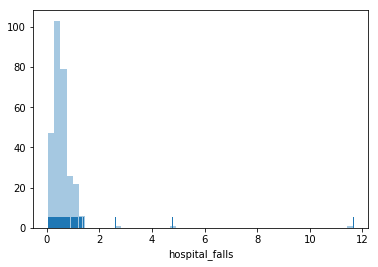

In [204]:
sns.distplot(scraped_cities.hospital_falls, kde=False, rug=True) 

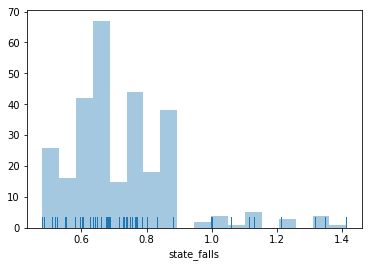

In [207]:
sns.distplot(scraped_cities.state_falls, kde=False, rug=True) 

In [205]:
scraped_cities.corr()

hospital_falls  state_falls  total_recordable_cases  \
hospital_falls                  1.000000     0.180623               -0.132133   
state_falls                     0.180623     1.000000               -0.581477   
total_recordable_cases         -0.132133    -0.581477                1.000000   
total_cases                    -0.097401    -0.614813                0.937483   
cases_away_work                -0.075996    -0.517960                0.920390   
job_transfer_restriction       -0.074331    -0.302343                0.024809   
other_cases                    -0.125562    -0.337800                0.577264   
Population2010                 -0.004627    -0.012991                0.031556   
ARTHRITIS_CrudePrev            -0.060707    -0.081719                0.006721   
ARTHRITIS_AdjPrev              -0.084757    -0.102113                0.054101   
BINGE_CrudePrev                -0.001419     0.009759                0.122457   
BINGE_AdjPrev                   0.009811     0.015035                0.090462   
OBESITY_CrudePrev               0.069361     0.079856               -0.252701   
OBESITY_AdjPrev                 0.069017     0.069643               -0.221868   
SLEEP_CrudePrev                -0.052721    -0.308381                0.082390   
SLEEP_AdjPrev                  -0.050170    -0.316549                0.098695   
STROKE_CrudePrev               -0.018022    -0.131658               -0.074819   
STROKE_AdjPrev                 -0.025185    -0.143159               -0.062050   

                          total_cases  cases_away_work  \
hospital_falls              -0.097401        -0.075996   
state_falls                 -0.614813        -0.517960   
total_recordable_cases       0.937483         0.920390   
total_cases                  1.000000         0.958522   
cases_away_work              0.958522         1.000000   
job_transfer_restriction     0.096272        -0.179262   
other_cases                  0.410373         0.419885   
Population2010               0.101039         0.130671   
ARTHRITIS_CrudePrev         -0.089266        -0.060020   
ARTHRITIS_AdjPrev           -0.065859        -0.008944   
BINGE_CrudePrev              0.114179         0.103621   
BINGE_AdjPrev                0.084384         0.057371   
OBESITY_CrudePrev           -0.259305        -0.184946   
OBESITY_AdjPrev             -0.240322        -0.158386   
SLEEP_CrudePrev              0.085171         0.126354   
SLEEP_AdjPrev                0.092447         0.135842   
STROKE_CrudePrev            -0.102034        -0.062274   
STROKE_AdjPrev              -0.082156        -0.024484   

                          job_transfer_restriction  other_cases  \
hospital_falls                           -0.074331    -0.125562   
state_falls                              -0.302343    -0.337800   
total_recordable_cases                    0.024809     0.577264   
total_cases                               0.096272     0.410373   
cases_away_work                          -0.179262     0.419885   
job_transfer_restriction                  1.000000    -0.006109   
other_cases                              -0.006109     1.000000   
Population2010                           -0.138366    -0.130130   
ARTHRITIS_CrudePrev                      -0.120342     0.230003   
ARTHRITIS_AdjPrev                        -0.204139     0.332453   
BINGE_CrudePrev                          -0.019248    -0.041465   
BINGE_AdjPrev                             0.031807    -0.075274   
OBESITY_CrudePrev                        -0.227980    -0.013906   
OBESITY_AdjPrev                          -0.253266     0.020459   
SLEEP_CrudePrev                          -0.126522     0.182066   
SLEEP_AdjPrev                            -0.136686     0.201765   
STROKE_CrudePrev                         -0.138546     0.087419   
STROKE_AdjPrev                           -0.186493     0.111874   

                          Population2010  ARTHRITIS_CrudePrev  \
hospital_falls                 -0.004627    

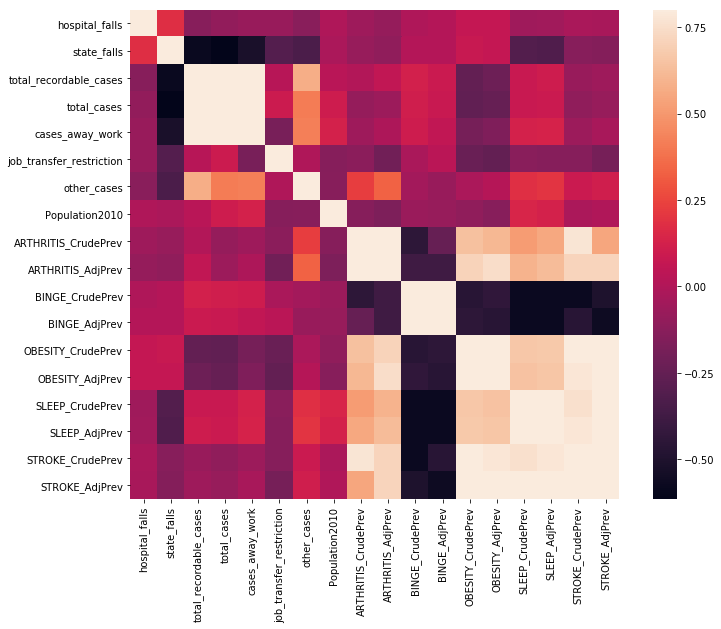

In [206]:
# Make the correlation matrix.
corrmat = scraped_cities.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [208]:
#Next I isolate only the continuous variables so that I can visualize any correlation. 
continuous = scraped_cities.loc[:, ['hospital_falls', 'state_falls', 'total_recordable_cases', 'total_cases', 
                                   'cases_away_work', 'job_transfer_restriction', 'other_cases', 
                                   'Population2010','ARTHRITIS_CrudePrev','ARTHRITIS_AdjPrev','BINGE_CrudePrev',
                                   'BINGE_AdjPrev','OBESITY_CrudePrev','OBESITY_AdjPrev','SLEEP_CrudePrev','SLEEP_AdjPrev',
                                   'STROKE_CrudePrev','STROKE_AdjPrev']]

In [209]:
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(continuous.shape)),
    columns=continuous.columns
)
# Combine the data and the noise.
continuous = continuous.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(continuous.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [239]:
train = scraped_cities.drop(['hospital','city', 'pediatric_trauma'],axis=1).dropna()

In [240]:
y_scrap = train.hospital_falls
x_scrap =  train.drop(['hospital_falls'],axis=1)

In [241]:
x_scrap = pd.get_dummies(x_scrap)

In [242]:
from sklearn import feature_selection
feature, p_value = feature_selection.f_regression(x_scrap, y_scrap)

In [243]:
column_list = x_scrap.columns
for i in range(len(feature)):
    if p_value[i] < 0.05:
        print(column_list[i])
        print(feature[i])
        print(p_value[i])

state_falls
9.936717620048192
0.0018211869762618687
total_recordable_cases
4.099525556417604
0.04397561815274478
state_NE
7.059473234446476
0.008400786853484233
state_TX
10.910336370819785
0.0010984968414087235
ARTHRITIS_Crude95CI_(19.7, 19.9)
169.2051843821479
8.652536355911096e-30
ARTHRITIS_Crude95CI_(23.1, 23.2)
7.059473234446476
0.008400786853484233
ARTHRITIS_Adj95CI_(20.0, 20.2)
169.2051843821479
8.652536355911096e-30
ARTHRITIS_Adj95CI_(23.5, 23.7)
7.059473234446476
0.008400786853484233
BINGE_Crude95CI_(16.5, 16.6)
169.2051843821479
8.652536355911096e-30
BINGE_Adj95CI_(16.2, 16.3)
169.2051843821479
8.652536355911096e-30
BINGE_Adj95CI_(20.8, 20.9)
7.059473234446476
0.008400786853484233
OBESITY_Crude95CI_(30.0, 30.2)
7.059473234446476
0.008400786853484233
OBESITY_Crude95CI_(34.9, 35.2)
169.2051843821479
8.652536355911096e-30
OBESITY_Adj95CI_(30.5, 30.7)
7.059473234446476
0.008400786853484233
OBESITY_Adj95CI_(35.3, 35.6)
169.2051843821479
8.652536355911096e-30
SLEEP_Crude95CI_(32.5, 

In [316]:
from sklearn import ensemble
# Random Forest Regression
rfr = ensemble.RandomForestRegressor(n_estimators=50)
rfr.fit(x_scrap,y_scrap)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [317]:
from sklearn.model_selection import cross_val_score

RFR_score = cross_val_score(rfr, x_scrap, y_scrap, cv=5)
print('\nEach Cross Validated R2 score: \n', RFR_score)
print("\nOverall Random Forest Regression R2: %0.2f (+/- %0.2f)\n" % (RFR_score.mean(), RFR_score.std() * 2))


Each Cross Validated R2 score: 
 [-0.00157769 -0.08679165  0.03472108 -0.00055083 -0.06390438]

Overall Random Forest Regression R2: -0.02 (+/- 0.09)



In [318]:
# Saving the feature names
feature_list = list(x_scrap.columns)
# Get numerical feature importances
importances = list(rfr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [319]:
feature_importances = feature_importances[:20]
importance = []
importance_name = []
for each in feature_importances:
    importance.append(round(each[1], 2))
    importance_name.append(each[0])

In [320]:
feature_importances

[('ARTHRITIS_Crude95CI_(19.7, 19.9)', 0.11),
 ('OBESITY_Crude95CI_(34.9, 35.2)', 0.09),
 ('ARTHRITIS_Adj95CI_(20.0, 20.2)', 0.07),
 ('SLEEP_Crude95CI_(33.7, 34.0)', 0.06),
 ('OBESITY_Adj95CI_(35.3, 35.6)', 0.05),
 ('STROKE_Adj95CI_( 3.0,  3.0)', 0.05),
 ('state_falls', 0.04),
 ('BINGE_Adj95CI_(16.2, 16.3)', 0.04),
 ('TotalRate', 0.04),
 ('BINGE_Crude95CI_(16.5, 16.6)', 0.03),
 ('OBESITY_Adj95CI_(30.5, 30.7)', 0.03),
 ('BINGE_CrudePrev', 0.02),
 ('BINGE_Adj95CI_(20.8, 20.9)', 0.02),
 ('cases_away_work', 0.01),
 ('other_cases', 0.01),
 ('Population2010', 0.01),
 ('ARTHRITIS_CrudePrev', 0.01),
 ('ARTHRITIS_AdjPrev', 0.01),
 ('BINGE_AdjPrev', 0.01),
 ('OBESITY_AdjPrev', 0.01)]

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# Logistic Regression
lr = LinearRegression(n_jobs=5)
lr.fit(x_scrap, y_scrap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, normalize=False)

In [257]:
LR_score = cross_val_score(lr, x_scrap, y_scrap, cv=5)
print('\nEach Cross Validated R2 score: \n', LR_score)
print("\nOverall Linear Regression R2: %0.2f (+/- %0.2f)\n" % (LR_score.mean(), LR_score.std() * 2))


Each Cross Validated R2 score: 
 [-1.55016402e+12 -3.03913814e+12 -1.17443107e+12 -7.44857834e+05
 -2.97259631e+10]

Overall Linear Regression R2: -1158691986652.85 (+/- 2246188855547.61)



In [252]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_scrap,y_scrap)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [253]:
SVR_score = cross_val_score(svr, x_scrap, y_scrap, cv=5)
print('\nEach Cross Validated R2 score: \n', SVR_score)
print("\nOverall Support Vector Regression R2: %0.2f (+/- %0.2f)\n" % (SVR_score.mean(), SVR_score.std() * 2))


Each Cross Validated R2 score: 
 [-0.00125565 -0.01416092 -0.02262573 -0.00578289 -0.04845774]

Overall Support Vector Regression R2: -0.02 (+/- 0.03)



## Exploring the CMS Fall Dataset

In [258]:
#Before I go any further I want to check in there are any null values in my dataset
print(CMS_cities.isnull().sum())

hospital_ID                               0
measure_name                              0
hospital_fall_rate                        0
state_average                             0
hospital                                  0
city                                      0
state                                     0
ownership                                 0
emergency_services                        0
EHR                                       0
rating                                    0
mortality_comparison                      4
safety_comparison                         2
readmission_comparison                    4
parient_experience_comparison             2
effective_care_comparison                 1
timely_care_comparison                    4
efficient_medical_imaging_comparison     12
adult_trauma                              0
pediatric_trauma                        227
total_recordable_cases                   27
total_cases                              27
cases_away_work                 

In [259]:
CMS_cities.dtypes

hospital_ID                             float64
measure_name                             object
hospital_fall_rate                      float64
state_average                            object
hospital                                 object
city                                     object
state                                    object
ownership                                object
emergency_services                       object
EHR                                      object
rating                                   object
mortality_comparison                     object
safety_comparison                        object
readmission_comparison                   object
parient_experience_comparison            object
effective_care_comparison                object
timely_care_comparison                   object
efficient_medical_imaging_comparison     object
adult_trauma                             object
pediatric_trauma                         object
total_recordable_cases                  

In [260]:
CMS_cities.state_average = CMS_cities.state_average.astype(float)

In [261]:
CMS_cities.describe()

hospital_ID  hospital_fall_rate  state_average  \
count     284.000000          284.000000     284.000000   
mean   236133.873239            0.445123       0.489810   
std    148897.445407            0.281126       0.103989   
min     10033.000000            0.000000       0.295000   
25%     80002.500000            0.264750       0.418000   
50%    230031.000000            0.413000       0.483000   
75%    360048.750000            0.566500       0.540000   
max    670041.000000            1.871000       1.113000   

       total_recordable_cases  total_cases  cases_away_work  \
count              257.000000   257.000000       257.000000   
mean                 6.656420     3.038521         2.121401   
std                  2.062814     1.788929         1.841548   
min                  3.800000     0.000000         0.000000   
25%                  5.100000     1.500000         0.800000   
50%                  6.400000     2.600000         1.400000   
75%                  7.600000     4.100000         2.400000   
max                 12.900000     7.900000         7.700000   

       job_transfer_restriction  other_cases  Population2010  \
count                257.000000   257.000000    2.840000e+02   
mean                   0.975875     3.583268    4.129906e+05   
std                    0.566480     0.775549    9.380240e+05   
min                    0.000000     0.000000    4.241700e+04   
25%                    0.500000     3.200000    1.033842e+05   
50%                    1.000000     3.600000    1.538880e+05   
75%                    1.200000     3.900000    3.910195e+05   
max                    2.900000     6.000000    8.175133e+06   

       ARTHRITIS_CrudePrev  ARTHRITIS_AdjPrev  BINGE_CrudePrev  BINGE_AdjPrev  \
count           284.000000         284.000000       284.000000     284.000000   
mean             23.183451          24.363732        16.886268      16.233451   
std               4.553092           3.732512         2.762045       2.583457   
min              12.800000          17.500000         9.100000       7.100000   
25%              19.500000          21.600000        15.200000      14.600000   
50%              22.700000          23.850000        16.500000      15.800000   
75%              25.700000          26.425000        18.425000      17.700000   
max              36.800000          35.800000        25.300000      24.000000   

       OBESITY_CrudePrev  OBESITY_AdjPrev  SLEEP_CrudePrev  SLEEP_AdjPrev  \
count         284.000000       284.000000       284.000000     284.000000   
mean           30.569718        31.335915        36.462676      36.596127   
std             5.618458         5.711099         5.163525       5.175727   
min            18.400000        18.400000        24.400000      24.500000   
25%            26.100000        26.700000        33.375000      33.400000   
50%            30.750000        31.800000        35.950000      35.700000   
75%            34.000000        34.900000        39.725000      40.000000   
max            47.100000        47.200000        51.300000      52.000000   

       STROKE_CrudePrev  STROKE_AdjPrev  
count        284.000000      284.000000  
mean           3.067254        3.262676  
std            0.798199        0.758286  
min            1.500000        2.000000  
25%            2.500000        2.700000  
50%            2.900000        3.100000  
75%            3.500000        3.600000  
max            6.500000        5.800000

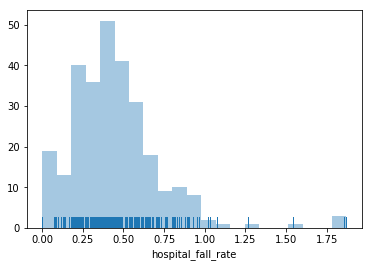

In [262]:
sns.distplot(CMS_cities.hospital_fall_rate, kde=False, rug=True)

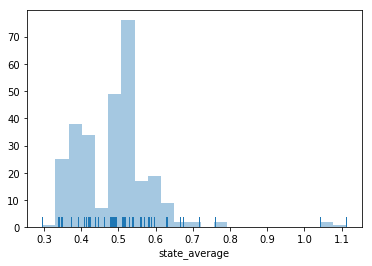

In [263]:
sns.distplot(CMS_cities.state_average, kde=False, rug=True)

In [264]:
CMS_cities.corr()

hospital_ID  hospital_fall_rate  state_average  \
hospital_ID                  1.000000            0.046257       0.202303   
hospital_fall_rate           0.046257            1.000000       0.033423   
state_average                0.202303            0.033423       1.000000   
total_recordable_cases      -0.332134           -0.037212      -0.442012   
total_cases                 -0.268500           -0.013077      -0.426454   
cases_away_work             -0.159714            0.038978      -0.342731   
job_transfer_restriction    -0.345459           -0.188919      -0.265917   
other_cases                 -0.209417           -0.038620      -0.301791   
Population2010               0.011877           -0.049495      -0.007730   
ARTHRITIS_CrudePrev          0.088607           -0.033089       0.032038   
ARTHRITIS_AdjPrev            0.203751            0.012877       0.021725   
BINGE_CrudePrev              0.068043           -0.088745       0.133329   
BINGE_AdjPrev                0.009599           -0.121434       0.144318   
OBESITY_CrudePrev            0.264407            0.060550       0.050795   
OBESITY_AdjPrev              0.297961            0.074212       0.060577   
SLEEP_CrudePrev              0.027484            0.014687      -0.109261   
SLEEP_AdjPrev                0.035938            0.015506      -0.101458   
STROKE_CrudePrev             0.056948            0.020004      -0.052650   
STROKE_AdjPrev               0.120025            0.066070      -0.073178   

                          total_recordable_cases  total_cases  \
hospital_ID                            -0.332134    -0.268500   
hospital_fall_rate                     -0.037212    -0.013077   
state_average                          -0.442012    -0.426454   
total_recordable_cases                  1.000000     0.925778   
total_cases                             0.925778     1.000000   
cases_away_work                         0.923479     0.950605   
job_transfer_restriction                0.035801     0.176807   
other_cases                             0.492935     0.361753   
Population2010                          0.049227     0.111451   
ARTHRITIS_CrudePrev                    -0.064415    -0.150869   
ARTHRITIS_AdjPrev                      -0.027958    -0.128205   
BINGE_CrudePrev                         0.116941     0.122626   
BINGE_AdjPrev                           0.081621     0.082753   
OBESITY_CrudePrev                      -0.250922    -0.257529   
OBESITY_AdjPrev                        -0.232635    -0.247478   
SLEEP_CrudePrev                         0.030635     0.041274   
SLEEP_AdjPrev                           0.037110     0.039778   
STROKE_CrudePrev                       -0.113813    -0.141315   
STROKE_AdjPrev                         -0.094562    -0.107890   

                          cases_away_work  job_transfer_restriction  \
hospital_ID                     -0.159714                 -0.345459   
hospital_fall_rate               0.038978                 -0.188919   
state_average                   -0.342731                 -0.265917   
total_recordable_cases           0.923479                  0.035801   
total_cases                      0.950605                  0.176807   
cases_away_work                  1.000000                 -0.124681   
job_transfer_restriction        -0.124681                  1.000000   
other_cases                      0.396645                 -0.061294   
Population2010                   0.132300                 -0.092056   
ARTHRITIS_CrudePrev             -0.122345                 -0.112913   
ARTHRITIS_AdjPrev               -0.074920                 -0.176171   
BINGE_CrudePrev                  0.085444                  0.083567   
BINGE_AdjPrev                    0.031480                  0.118919   
OBESITY_CrudePrev               -0.201247                 -0.158773   
OBESITY_AdjPrev                 -0.182911                 -0.181975   
SLEEP_CrudePrev                  0.077461                 -0.093825 

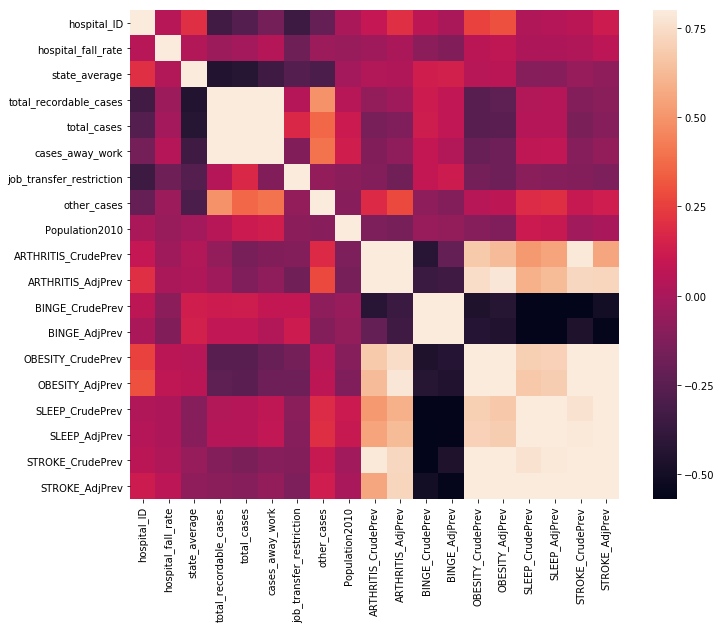

In [265]:
# Make the correlation matrix.
corrmat = CMS_cities.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [266]:
#Next I isolate only the continuous variables so that I can visualize any correlation. 
continuous = CMS_cities.loc[:, ['hospital_fall_rate', 'state_average', 'total_recordable_cases', 'total_cases', 
                                   'cases_away_work', 'job_transfer_restriction', 'other_cases', 
                                   'Population2010','ARTHRITIS_CrudePrev','ARTHRITIS_AdjPrev','BINGE_CrudePrev',
                                   'BINGE_AdjPrev','OBESITY_CrudePrev','OBESITY_AdjPrev','SLEEP_CrudePrev','SLEEP_AdjPrev',
                                   'STROKE_CrudePrev','STROKE_AdjPrev']]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


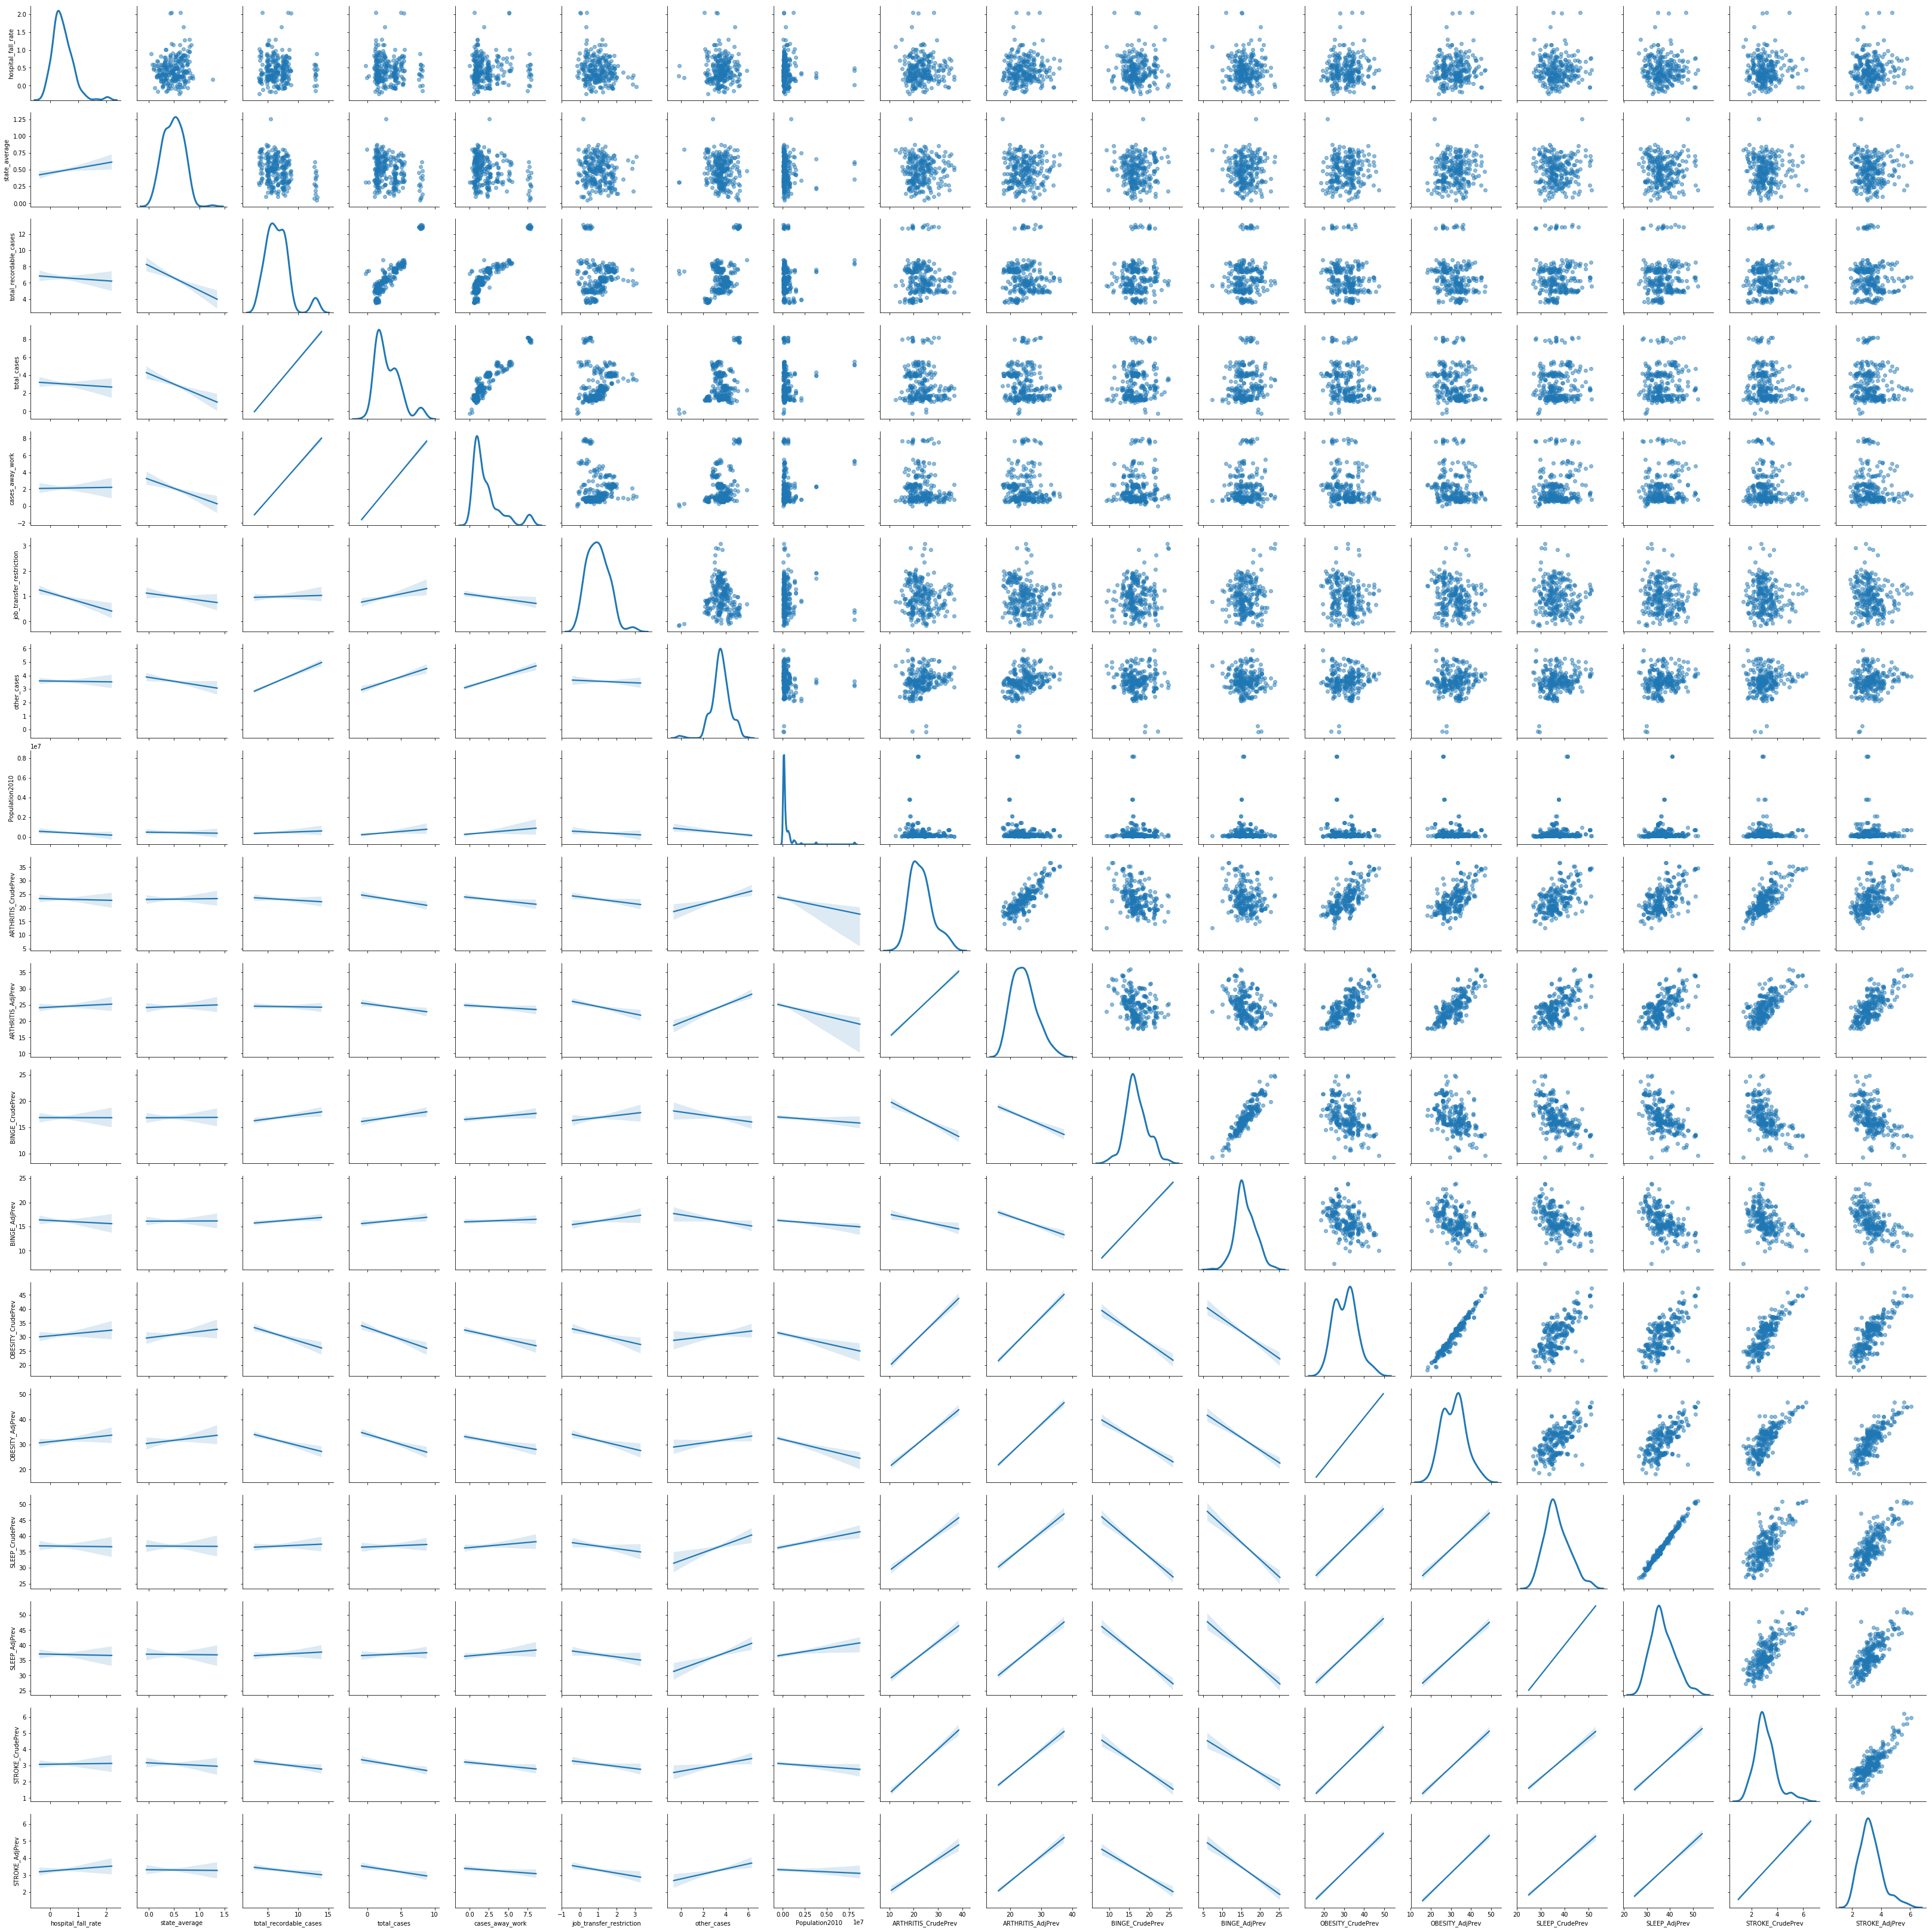

In [267]:
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(continuous.shape)),
    columns=continuous.columns
)
# Combine the data and the noise.
continuous = continuous.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(continuous.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [278]:
CMS_cities = CMS_cities.drop(['StateAbbr', 'PlaceName'],axis=1)

In [279]:
CMS_cities

hospital_ID      measure_name  hospital_fall_rate  state_average  \
0        20001.0  FALLS AND TRAUMA               0.575          0.485   
1        20026.0  FALLS AND TRAUMA               1.544          0.485   
2        10033.0  FALLS AND TRAUMA               0.389          0.437   
3        40134.0  FALLS AND TRAUMA               0.098          0.665   
4        30036.0  FALLS AND TRAUMA               0.492          0.562   
5        30088.0  FALLS AND TRAUMA               0.841          0.562   
6        30121.0  FALLS AND TRAUMA               0.556          0.562   
7        30092.0  FALLS AND TRAUMA               0.571          0.562   
8        30014.0  FALLS AND TRAUMA               0.383          0.562   
9        30024.0  FALLS AND TRAUMA               0.368          0.562   
10       30038.0  FALLS AND TRAUMA               0.206          0.562   
11       30006.0  FALLS AND TRAUMA               0.880          0.562   
12       50115.0  FALLS AND TRAUMA               0.246          0.392   
13       50367.0  FALLS AND TRAUMA               0.189          0.392   
14       50060.0  FALLS AND TRAUMA               0.193          0.392   
15       50056.0  FALLS AND TRAUMA               0.572          0.392   
16       50485.0  FALLS AND TRAUMA               0.457          0.392   
17       50191.0  FALLS AND TRAUMA               0.698          0.392   
18       50625.0  FALLS AND TRAUMA               0.269          0.392   
19       50262.0  FALLS AND TRAUMA               0.493          0.392   
20       50696.0  FALLS AND TRAUMA               0.520          0.392   
21       50104.0  FALLS AND TRAUMA               0.000          0.392   
22       50567.0  FALLS AND TRAUMA               0.402          0.392   
23       50464.0  FALLS AND TRAUMA               0.759          0.392   
24       50557.0  FALLS AND TRAUMA               0.245          0.392   
25       50292.0  FALLS AND TRAUMA               0.264          0.392   
26       50009.0  FALLS AND TRAUMA               0.301          0.392   
27       50320.0  FALLS AND TRAUMA               0.000          0.392   
28       50348.0  FALLS AND TRAUMA               0.427          0.392   
29       50438.0  FALLS AND TRAUMA               0.374          0.392   
..           ...               ...                 ...            ...   
254     450015.0  FALLS AND TRAUMA               0.143          0.540   
255     450021.0  FALLS AND TRAUMA               0.411          0.540   
256     450379.0  FALLS AND TRAUMA               1.871          0.540   
257     450634.0  FALLS AND TRAUMA               0.332          0.540   
258     450024.0  FALLS AND TRAUMA               0.000          0.540   
259     450039.0  FALLS AND TRAUMA               0.376          0.540   
260     450135.0  FALLS AND TRAUMA               0.314          0.540   
261     450803.0  FALLS AND TRAUMA               0.536          0.540   
262     450289.0  FALLS AND TRAUMA               0.480          0.540   
263     450040.0  FALLS AND TRAUMA               0.901          0.540   
264     450686.0  FALLS AND TRAUMA               0.454          0.540   
265     450132.0  FALLS AND TRAUMA               0.186          0.540   
266     450771.0  FALLS AND TRAUMA               0.000          0.540   
267     450651.0  FALLS AND TRAUMA               0.666          0.540   
268     670041.0  FALLS AND TRAUMA               0.369          0.540   
269     450718.0  FALLS AND TRAUMA               0.799          0.540   
270     450213.0  FALLS AND TRAUMA               0.754          0.540   
271     450083.0  FALLS AND TRAUMA               0.770          0.540   
272     450102.0  FALLS AND TRAUMA               0.463          0.540   
273     450101.0  FALLS AND TRAUMA               0.518          0.540   
274     450010.0  FALLS AND TRAUMA               0.648          0.540   
275     460005.0  FALLS AND TRAUMA               0.368          0.516   
276     460001.0  FALLS AND TRAUMA               0.896         

In [297]:
CMS_train = CMS_cities.drop(['hospital', 'hospital_ID', 'measure_name', 'city', 'pediatric_trauma'],axis=1).dropna()

In [298]:
y_CMS = CMS_train.hospital_fall_rate
x_CMS =  CMS_train.drop(['hospital_fall_rate'],axis=1)

In [299]:
x_CMS = pd.get_dummies(x_CMS)

In [300]:
from sklearn import feature_selection
feature, p_value = feature_selection.f_regression(x_CMS, y_CMS)

/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [301]:
column_list = x_CMS.columns
for i in range(len(feature)):
    if p_value[i] < 0.05:
        print(column_list[i])
        print(feature[i])
        print(p_value[i])

job_transfer_restriction
5.110368371870669
0.02466866560446736
state_IN
4.417536984872341
0.03660107610089375
state_SC
4.797060079678967
0.02945919852608694
state_UT
3.9770905179005553
0.047240620210294695
state_WI
4.631277006686214
0.032379671657274504
ownership_Government - State
7.807122499863425
0.005619071437412667
ownership_Voluntary non-profit - Church
4.784978020827728
0.029662395909263645
rating_3
4.811200124482162
0.029223242273477862
parient_experience_comparison_Above
7.896650606518155
0.005356028259762438
timely_care_comparison_Same
4.628716371902328
0.0324270946832193
efficient_medical_imaging_comparison_Same
6.22663262848444
0.013248783856311841
ARTHRITIS_Crude95CI_(12.6, 13.0)
4.314986135036178
0.03882875132740339
ARTHRITIS_Crude95CI_(14.8, 15.3)
7.059305945203429
0.008408008673135535
ARTHRITIS_Crude95CI_(16.2, 16.4)
5.005661160552549
0.026171774716328963
ARTHRITIS_Crude95CI_(21.0, 21.4)
5.662961339291344
0.018099441006939433
ARTHRITIS_Crude95CI_(22.8, 22.9)
4.017189903

In [307]:
from sklearn import ensemble
# Random Forest Regression
CMS_rfr = ensemble.RandomForestRegressor(n_estimators=50)
CMS_rfr.fit(x_CMS,y_CMS)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [308]:
from sklearn.model_selection import cross_val_score

RFR_score = cross_val_score(CMS_rfr, x_CMS, y_CMS, cv=5)
print('\nEach Cross Validated R2 score: \n', RFR_score)
print("\nOverall Random Forest Regression R2: %0.2f (+/- %0.2f)\n" % (RFR_score.mean(), RFR_score.std() * 2))


Each Cross Validated R2 score: 
 [-0.00262411 -0.27361643 -0.28884052 -0.0957655   0.12245503]

Overall Random Forest Regression R2: -0.11 (+/- 0.32)



In [312]:
# Saving the feature names
feature_list = list(x_CMS.columns)
# Get numerical feature importances
importances = list(CMS_rfr.feature_importances_)
# List of tuples with variable and importance
CMS_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
CMS_feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [313]:
CMS_feature_importances = CMS_feature_importances[:20]
importance = []
importance_name = []
for each in CMS_feature_importances:
    importance.append(round(each[1], 2))
    importance_name.append(each[0])

In [315]:
CMS_feature_importances

[('Population2010', 0.07),
 ('ARTHRITIS_CrudePrev', 0.07),
 ('state_average', 0.06),
 ('ARTHRITIS_AdjPrev', 0.03),
 ('BINGE_CrudePrev', 0.03),
 ('BINGE_AdjPrev', 0.03),
 ('SLEEP_CrudePrev', 0.03),
 ('SLEEP_AdjPrev', 0.03),
 ('job_transfer_restriction', 0.02),
 ('other_cases', 0.02),
 ('OBESITY_CrudePrev', 0.02),
 ('OBESITY_AdjPrev', 0.02),
 ('STROKE_AdjPrev', 0.02),
 ('rating_3', 0.02),
 ('parient_experience_comparison_Above', 0.02),
 ('timely_care_comparison_Same', 0.02),
 ('total_recordable_cases', 0.01),
 ('total_cases', 0.01),
 ('cases_away_work', 0.01),
 ('STROKE_CrudePrev', 0.01)]

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# Logistic Regression
CMS_lr = LinearRegression(n_jobs=5)
CMS_lr.fit(x_CMS, y_CMS)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, normalize=False)

In [291]:
LR_score = cross_val_score(CMS_lr, x_CMS, y_CMS, cv=5)
print('\nEach Cross Validated R2 score: \n', LR_score)
print("\nOverall Linear Regression R2: %0.2f (+/- %0.2f)\n" % (LR_score.mean(), LR_score.std() * 2))


Each Cross Validated R2 score: 
 [-3.19445498e+00 -1.62074166e+09 -1.70559220e+11 -3.82863468e+06
 -1.66484759e+10]

Overall Linear Regression R2: -37766453169.39 (+/- 133382820607.59)



In [292]:
from sklearn.svm import SVR

CMS_svr = SVR()
CMS_svr.fit(x_CMS, y_CMS)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [293]:
SVR_score = cross_val_score(CMS_svr, x_CMS, y_CMS, cv=5)
print('\nEach Cross Validated R2 score: \n', SVR_score)
print("\nOverall Support Vector Regression R2: %0.2f (+/- %0.2f)\n" % (SVR_score.mean(), SVR_score.std() * 2))


Each Cross Validated R2 score: 
 [-0.0351311  -0.00760099 -0.02897097 -0.02146829  0.00723079]

Overall Support Vector Regression R2: -0.02 (+/- 0.03)



## Comparing the Important Features for each Dataset

In [322]:
feature_importances

[('ARTHRITIS_Crude95CI_(19.7, 19.9)', 0.11),
 ('OBESITY_Crude95CI_(34.9, 35.2)', 0.09),
 ('ARTHRITIS_Adj95CI_(20.0, 20.2)', 0.07),
 ('SLEEP_Crude95CI_(33.7, 34.0)', 0.06),
 ('OBESITY_Adj95CI_(35.3, 35.6)', 0.05),
 ('STROKE_Adj95CI_( 3.0,  3.0)', 0.05),
 ('state_falls', 0.04),
 ('BINGE_Adj95CI_(16.2, 16.3)', 0.04),
 ('TotalRate', 0.04),
 ('BINGE_Crude95CI_(16.5, 16.6)', 0.03),
 ('OBESITY_Adj95CI_(30.5, 30.7)', 0.03),
 ('BINGE_CrudePrev', 0.02),
 ('BINGE_Adj95CI_(20.8, 20.9)', 0.02),
 ('cases_away_work', 0.01),
 ('other_cases', 0.01),
 ('Population2010', 0.01),
 ('ARTHRITIS_CrudePrev', 0.01),
 ('ARTHRITIS_AdjPrev', 0.01),
 ('BINGE_AdjPrev', 0.01),
 ('OBESITY_AdjPrev', 0.01)]

In [323]:
CMS_feature_importances

[('Population2010', 0.07),
 ('ARTHRITIS_CrudePrev', 0.07),
 ('state_average', 0.06),
 ('ARTHRITIS_AdjPrev', 0.03),
 ('BINGE_CrudePrev', 0.03),
 ('BINGE_AdjPrev', 0.03),
 ('SLEEP_CrudePrev', 0.03),
 ('SLEEP_AdjPrev', 0.03),
 ('job_transfer_restriction', 0.02),
 ('other_cases', 0.02),
 ('OBESITY_CrudePrev', 0.02),
 ('OBESITY_AdjPrev', 0.02),
 ('STROKE_AdjPrev', 0.02),
 ('rating_3', 0.02),
 ('parient_experience_comparison_Above', 0.02),
 ('timely_care_comparison_Same', 0.02),
 ('total_recordable_cases', 0.01),
 ('total_cases', 0.01),
 ('cases_away_work', 0.01),
 ('STROKE_CrudePrev', 0.01)]